### EDA Performed on Myntra Products Dataset
##### Dataset_Source:Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)

In [2]:
df=pd.read_csv('myntra.csv')
df.head()

URL  Product_id   BrandName  \
0  https://www.myntra.com/jeans/roadster/roadster...     2296012    Roadster   
1  https://www.myntra.com/track-pants/locomotive/...    13780156  LOCOMOTIVE   
2  https://www.myntra.com/shirts/roadster/roadste...    11895958    Roadster   
3  https://www.myntra.com/shapewear/zivame/zivame...     4335679      Zivame   
4  https://www.myntra.com/tshirts/roadster/roadst...    11690882    Roadster   

                Category Individual_category category_by_Gender  \
0            Bottom Wear               jeans                Men   
1            Bottom Wear         track-pants                Men   
2                Topwear              shirts                Men   
3  Lingerie & Sleep Wear           shapewear              Women   
4                Western             tshirts              Women   

                                         Description  DiscountPrice (in Rs)  \
0  roadster men navy blue slim fit mid rise clean...                  824.0   
1  locomotive men black  white solid slim fit tra...                  517.0   
2  roadster men navy white  black geometric print...                  629.0   
3  zivame women black saree shapewear zi3023core0...                  893.0   
4  roadster women white solid v neck pure cotton ...                    NaN   

   OriginalPrice (in Rs) DiscountOffer              SizeOption  Ratings  \
0                 1499.0       45% OFF      28, 30, 32, 34, 36      3.9   
1                 1149.0       55% OFF             S, M, L, XL      4.0   
2                 1399.0       55% OFF  38, 40, 42, 44, 46, 48      4.3   
3                 1295.0       31% OFF        S, M, L, XL, XXL      4.2   
4                  599.0       35% OFF         XS, S, M, L, XL      4.2   

   Reviews  
0    999.0  
1    999.0  
2    999.0  
3    999.0  
4    999.0

In [3]:
data=df.copy()

In [4]:
data.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

In [5]:
data.drop(['URL','Product_id','Description','SizeOption'],axis=1,inplace=True) 

In [6]:
data.head()

BrandName               Category Individual_category category_by_Gender  \
0    Roadster            Bottom Wear               jeans                Men   
1  LOCOMOTIVE            Bottom Wear         track-pants                Men   
2    Roadster                Topwear              shirts                Men   
3      Zivame  Lingerie & Sleep Wear           shapewear              Women   
4    Roadster                Western             tshirts              Women   

   DiscountPrice (in Rs)  OriginalPrice (in Rs) DiscountOffer  Ratings  \
0                  824.0                 1499.0       45% OFF      3.9   
1                  517.0                 1149.0       55% OFF      4.0   
2                  629.0                 1399.0       55% OFF      4.3   
3                  893.0                 1295.0       31% OFF      4.2   
4                    NaN                  599.0       35% OFF      4.2   

   Reviews  
0    999.0  
1    999.0  
2    999.0  
3    999.0  
4    999.0

In [7]:
data.shape

(526564, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BrandName              526564 non-null  object 
 1   Category               526564 non-null  object 
 2   Individual_category    526564 non-null  object 
 3   category_by_Gender     526564 non-null  object 
 4   DiscountPrice (in Rs)  333406 non-null  float64
 5   OriginalPrice (in Rs)  526564 non-null  float64
 6   DiscountOffer          452258 non-null  object 
 7   Ratings                190412 non-null  float64
 8   Reviews                190412 non-null  float64
dtypes: float64(4), object(5)
memory usage: 36.2+ MB


#### Basic Data Cleaning before EDA

In [9]:
#Here expand is set to True, So that the string is split into two seperate columns based the seperator passed

data[['Discount','off']]=data['DiscountOffer'].str.split('%',expand=True) 
data.head()

BrandName               Category Individual_category category_by_Gender  \
0    Roadster            Bottom Wear               jeans                Men   
1  LOCOMOTIVE            Bottom Wear         track-pants                Men   
2    Roadster                Topwear              shirts                Men   
3      Zivame  Lingerie & Sleep Wear           shapewear              Women   
4    Roadster                Western             tshirts              Women   

   DiscountPrice (in Rs)  OriginalPrice (in Rs) DiscountOffer  Ratings  \
0                  824.0                 1499.0       45% OFF      3.9   
1                  517.0                 1149.0       55% OFF      4.0   
2                  629.0                 1399.0       55% OFF      4.3   
3                  893.0                 1295.0       31% OFF      4.2   
4                    NaN                  599.0       35% OFF      4.2   

   Reviews Discount   off  
0    999.0       45   OFF  
1    999.0       55   OFF  
2    999.0       55   OFF  
3    999.0       31   OFF  
4    999.0       35   OFF

In [10]:
data.drop(['DiscountOffer','off'],axis=1,inplace=True)

In [11]:
data.head()

BrandName               Category Individual_category category_by_Gender  \
0    Roadster            Bottom Wear               jeans                Men   
1  LOCOMOTIVE            Bottom Wear         track-pants                Men   
2    Roadster                Topwear              shirts                Men   
3      Zivame  Lingerie & Sleep Wear           shapewear              Women   
4    Roadster                Western             tshirts              Women   

   DiscountPrice (in Rs)  OriginalPrice (in Rs)  Ratings  Reviews Discount  
0                  824.0                 1499.0      3.9    999.0       45  
1                  517.0                 1149.0      4.0    999.0       55  
2                  629.0                 1399.0      4.3    999.0       55  
3                  893.0                 1295.0      4.2    999.0       31  
4                    NaN                  599.0      4.2    999.0       35

In [12]:
data.rename(columns={'DiscountPrice (in Rs)':'DiscountPrice','OriginalPrice (in Rs)':'OriginalPrice'},inplace=True)

In [13]:
data.head()

BrandName               Category Individual_category category_by_Gender  \
0    Roadster            Bottom Wear               jeans                Men   
1  LOCOMOTIVE            Bottom Wear         track-pants                Men   
2    Roadster                Topwear              shirts                Men   
3      Zivame  Lingerie & Sleep Wear           shapewear              Women   
4    Roadster                Western             tshirts              Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews Discount  
0          824.0         1499.0      3.9    999.0       45  
1          517.0         1149.0      4.0    999.0       55  
2          629.0         1399.0      4.3    999.0       55  
3          893.0         1295.0      4.2    999.0       31  
4            NaN          599.0      4.2    999.0       35

In [14]:
data.isnull().sum()   

BrandName                   0
Category                    0
Individual_category         0
category_by_Gender          0
DiscountPrice          193158
OriginalPrice               0
Ratings                336152
Reviews                336152
Discount                74306
dtype: int64

In [15]:
data[data.Discount.isnull()]

BrandName     Category Individual_category category_by_Gender  \
8          Roadster      Western             tshirts              Women   
9          HERE&NOW  Bottom Wear               jeans                Men   
11         Roadster      Topwear             tshirts                Men   
17          Sangria    Plus Size          kurta-sets              Women   
20         Roadster      Western             tshirts              Women   
...             ...          ...                 ...                ...   
526559          H&M      Western            sweaters              Women   
526560          H&M      Western             jackets              Women   
526561  250 DESIGNS      Western             dresses              Women   
526562       Masaba      Western             dresses              Women   
526563       Jockey      Western             tshirts              Women   

        DiscountPrice  OriginalPrice  Ratings  Reviews Discount  
8                 NaN         1098.0      4.3    997.0      NaN  
9                 NaN         2749.0      3.5    996.0      NaN  
11                NaN          699.0      4.1    996.0      NaN  
17                NaN         3999.0      4.3    995.0      NaN  
20                NaN         1298.0      4.4    994.0      NaN  
...               ...            ...      ...      ...      ...  
526559            NaN         9999.0      NaN      NaN      NaN  
526560            NaN         9999.0      NaN      NaN      NaN  
526561            NaN         9999.0      NaN      NaN      NaN  
526562            NaN         9999.0      NaN      NaN      NaN  
526563            NaN          799.0      NaN      NaN      NaN  

[74306 rows x 9 columns]

In [16]:
# There are Missing values in DiscountPrice  and is related to Discount column

In [17]:
c=list(data[data.Discount.isnull()].index)  #Fetaching Index where Discount values are null

In [18]:
#Dropping rows where Discount values are null--since size of data is high It may not be a problem for future analysis

data.drop(c,inplace=True)             
data.isnull().sum()

BrandName                   0
Category                    0
Individual_category         0
category_by_Gender          0
DiscountPrice          119036
OriginalPrice               0
Ratings                281234
Reviews                281234
Discount                    0
dtype: int64

In [19]:
# Replacing Nan values in Discount price with the exact Discount price calculated using the formula
# Disccount_Price=data.OriginalPrice*data.Discount)/100

In [20]:
#d=list(data[data.DiscountPrice.isnull()].index)


In [21]:
data.columns

Index(['BrandName', 'Category', 'Individual_category', 'category_by_Gender',
       'DiscountPrice', 'OriginalPrice', 'Ratings', 'Reviews', 'Discount'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452258 entries, 0 to 510812
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   BrandName            452258 non-null  object 
 1   Category             452258 non-null  object 
 2   Individual_category  452258 non-null  object 
 3   category_by_Gender   452258 non-null  object 
 4   DiscountPrice        333222 non-null  float64
 5   OriginalPrice        452258 non-null  float64
 6   Ratings              171024 non-null  float64
 7   Reviews              171024 non-null  float64
 8   Discount             452258 non-null  object 
dtypes: float64(4), object(5)
memory usage: 34.5+ MB


In [23]:
data.sample(10)

BrandName     Category Individual_category category_by_Gender  \
284949    Allen Solly      Topwear              shirts                Men   
499986         Myshka      Western             dresses              Women   
446242           Ives      Western                tops              Women   
143552  Tokyo Talkies      Western             dresses              Women   
148914  SATYAM WEAVES  Indian Wear              sarees              Women   
28628           Libas  Indian Wear              kurtas              Women   
205217       Richlook  Bottom Wear            trousers                Men   
36661   Sports52 wear  Bottom Wear         track-pants                Men   
29405     one8 x PUMA  Bottom Wear         track-pants                Men   
368070  Ethnic basket  Indian Wear              kurtas              Women   

        DiscountPrice  OriginalPrice  Ratings  Reviews      Discount  
284949         1999.0         2499.0      NaN      NaN            20  
499986            NaN         4999.0      NaN      NaN            77  
446242            NaN         1199.0      NaN      NaN            40  
143552            NaN         1949.0      4.0      8.0            67  
148914         1199.0         4499.0      3.9      7.0  Rs. 3300 OFF  
28628          1124.0         1499.0      4.2     94.0            25  
205217         2029.0         2899.0      NaN      NaN            30  
36661           398.0          995.0      3.8     71.0            60  
29405          1034.0         2299.0      4.2     91.0            55  
368070         1119.0         3999.0      NaN      NaN            72

In [24]:
#There are unwanted spaces at the begining and end of Discount values,It should be removed.
data['Discount']=data['Discount'].str.strip(' ')

In [25]:
#There are entries in discount columns where discount amount is explicitly given instead of discount percentage values
#Here I decide to remove such values based on the assumption that the size of the data is large

c=np.where(data.Discount.str.isnumeric(),False,True)  

In [26]:
x=list(data[c].index)
data.drop(x,inplace=True)

In [27]:
data.isnull().sum()

BrandName                   0
Category                    0
Individual_category         0
category_by_Gender          0
DiscountPrice          112225
OriginalPrice               0
Ratings                267265
Reviews                267265
Discount                    0
dtype: int64

In [28]:
data.Discount=data.Discount.astype('float64')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432814 entries, 0 to 510812
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   BrandName            432814 non-null  object 
 1   Category             432814 non-null  object 
 2   Individual_category  432814 non-null  object 
 3   category_by_Gender   432814 non-null  object 
 4   DiscountPrice        320589 non-null  float64
 5   OriginalPrice        432814 non-null  float64
 6   Ratings              165549 non-null  float64
 7   Reviews              165549 non-null  float64
 8   Discount             432814 non-null  float64
dtypes: float64(5), object(4)
memory usage: 33.0+ MB


In [30]:
data['DiscountPrice']=round((data.OriginalPrice*data.Discount)/100,0)  #replacing Nan values with the actual discount price

In [31]:
# a=' 5  '
# print(a.isnumeric())
# a=a.strip(' ')
# print(a.isnumeric())


In [32]:
data.isnull().sum()

BrandName                   0
Category                    0
Individual_category         0
category_by_Gender          0
DiscountPrice               0
OriginalPrice               0
Ratings                267265
Reviews                267265
Discount                    0
dtype: int64

In [33]:
data.shape

(432814, 9)

In [34]:
data.Ratings.unique()

array([3.9, 4. , 4.3, 4.2, 4.4, 3.7, 4.1, 3.8, 3.6, 4.5, 3.4, 3.5, 4.6,
       3.2, 3.3, 3. , 3.1, 2.9, 2.8, 4.7, 2.6, 2.5, 2.4, 2. , 2.7, 4.8,
       2.3, 4.9, 1.6, 2.2, 2.1, 1.8, 5. , 1.2, 1.9, 1.7, 1.4, 1.5, 1.1,
       1. , 1.3, nan])

In [35]:
data.Reviews.nunique()

996

In [36]:
data.Ratings=np.where(data.Ratings.isnull(),0,data.Ratings) # Replacing Nan values wid 0

In [37]:
data.Reviews=np.where(data.Reviews.isnull(),0,data.Reviews) # Replacing Nan values wid 0

In [38]:
data.isnull().sum()

BrandName              0
Category               0
Individual_category    0
category_by_Gender     0
DiscountPrice          0
OriginalPrice          0
Ratings                0
Reviews                0
Discount               0
dtype: int64

In [39]:
data.shape

(432814, 9)

In [40]:
data.head()

BrandName               Category Individual_category category_by_Gender  \
0    Roadster            Bottom Wear               jeans                Men   
1  LOCOMOTIVE            Bottom Wear         track-pants                Men   
2    Roadster                Topwear              shirts                Men   
3      Zivame  Lingerie & Sleep Wear           shapewear              Women   
4    Roadster                Western             tshirts              Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  
0          675.0         1499.0      3.9    999.0      45.0  
1          632.0         1149.0      4.0    999.0      55.0  
2          769.0         1399.0      4.3    999.0      55.0  
3          401.0         1295.0      4.2    999.0      31.0  
4          210.0          599.0      4.2    999.0      35.0

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432814 entries, 0 to 510812
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   BrandName            432814 non-null  object 
 1   Category             432814 non-null  object 
 2   Individual_category  432814 non-null  object 
 3   category_by_Gender   432814 non-null  object 
 4   DiscountPrice        432814 non-null  float64
 5   OriginalPrice        432814 non-null  float64
 6   Ratings              432814 non-null  float64
 7   Reviews              432814 non-null  float64
 8   Discount             432814 non-null  float64
dtypes: float64(5), object(4)
memory usage: 33.0+ MB


In [42]:
data.rename(columns={'category_by_Gender':'sex'},inplace=True)

In [43]:
cat_fea=[i for i in data.columns if data[i].dtype=='O']
cat_fea

['BrandName', 'Category', 'Individual_category', 'sex']

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432814 entries, 0 to 510812
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   BrandName            432814 non-null  object 
 1   Category             432814 non-null  object 
 2   Individual_category  432814 non-null  object 
 3   sex                  432814 non-null  object 
 4   DiscountPrice        432814 non-null  float64
 5   OriginalPrice        432814 non-null  float64
 6   Ratings              432814 non-null  float64
 7   Reviews              432814 non-null  float64
 8   Discount             432814 non-null  float64
dtypes: float64(5), object(4)
memory usage: 33.0+ MB


In [45]:
for i in cat_fea:
    print('{} has {} no of unique_values'.format(i,data[i].nunique()))

BrandName has 1659 no of unique_values
Category has 8 no of unique_values
Individual_category has 89 no of unique_values
sex has 2 no of unique_values


In [46]:
data.head()

BrandName               Category Individual_category    sex  \
0    Roadster            Bottom Wear               jeans    Men   
1  LOCOMOTIVE            Bottom Wear         track-pants    Men   
2    Roadster                Topwear              shirts    Men   
3      Zivame  Lingerie & Sleep Wear           shapewear  Women   
4    Roadster                Western             tshirts  Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  
0          675.0         1499.0      3.9    999.0      45.0  
1          632.0         1149.0      4.0    999.0      55.0  
2          769.0         1399.0      4.3    999.0      55.0  
3          401.0         1295.0      4.2    999.0      31.0  
4          210.0          599.0      4.2    999.0      35.0

#### Top 20 Brands With Most Items 

In [47]:
data.groupby(['BrandName'])['Category'].count().sort_values(ascending=False)[:20]

BrandName
Pothys                   15572
Roadster                  9541
KALINI                    9070
HERE&NOW                  6335
Ethnic basket             4758
Mast & Harbour            4652
HRX by Hrithik Roshan     4603
Friskers                  4513
Mitera                    4455
DressBerry                4330
Sangria                   4255
Puma                      4237
SOJANYA                   4123
URBANIC                   4058
Anouk                     3824
DEYANN                    3750
Clovia                    3156
Kanvin                    3049
VIMAL JONNEY              2962
Tokyo Talkies             2802
Name: Category, dtype: int64

In [53]:
c=data['BrandName'].value_counts().reset_index()[:20]
c

index  BrandName
0                  Pothys      15572
1                Roadster       9541
2                  KALINI       9070
3                HERE&NOW       6335
4           Ethnic basket       4758
5          Mast & Harbour       4652
6   HRX by Hrithik Roshan       4603
7                Friskers       4513
8                  Mitera       4455
9              DressBerry       4330
10                Sangria       4255
11                   Puma       4237
12                SOJANYA       4123
13                URBANIC       4058
14                  Anouk       3824
15                 DEYANN       3750
16                 Clovia       3156
17                 Kanvin       3049
18           VIMAL JONNEY       2962
19          Tokyo Talkies       2802

In [54]:
c.rename(columns={'index':'BrandName','BrandName':'Count'},inplace=True)

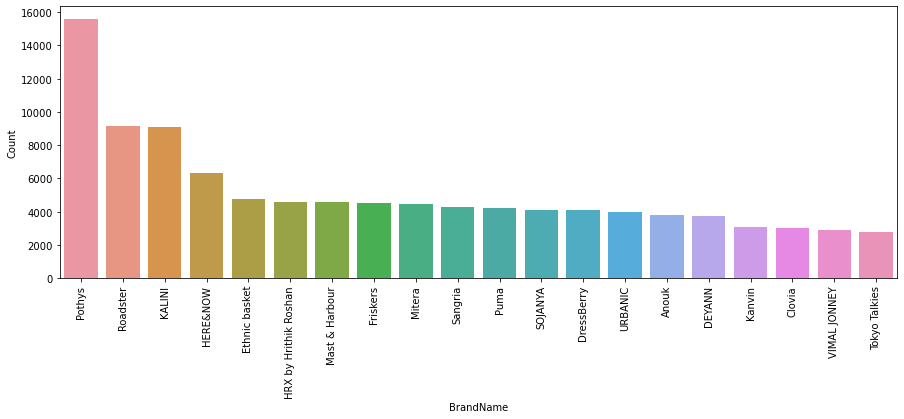

In [90]:
plt.figure(figsize=(15,5))
sns.barplot(data=c,x='BrandName',y='Count');
plt.xticks(rotation=90);

In [81]:
data.head()

BrandName               Category Individual_category    sex  \
0    Roadster            Bottom Wear               jeans    Men   
1  LOCOMOTIVE            Bottom Wear         track-pants    Men   
2    Roadster                Topwear              shirts    Men   
3      Zivame  Lingerie & Sleep Wear           shapewear  Women   
4    Roadster                Western             tshirts  Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  
0          675.0         1499.0      3.9    999.0      45.0  
1          632.0         1149.0      4.0    999.0      55.0  
2          769.0         1399.0      4.3    999.0      55.0  
3          401.0         1295.0      4.2    999.0      31.0  
4          210.0          599.0      4.2    999.0      35.0

In [60]:
#data.groupby(['BrandName','Category'])['Category'].count()

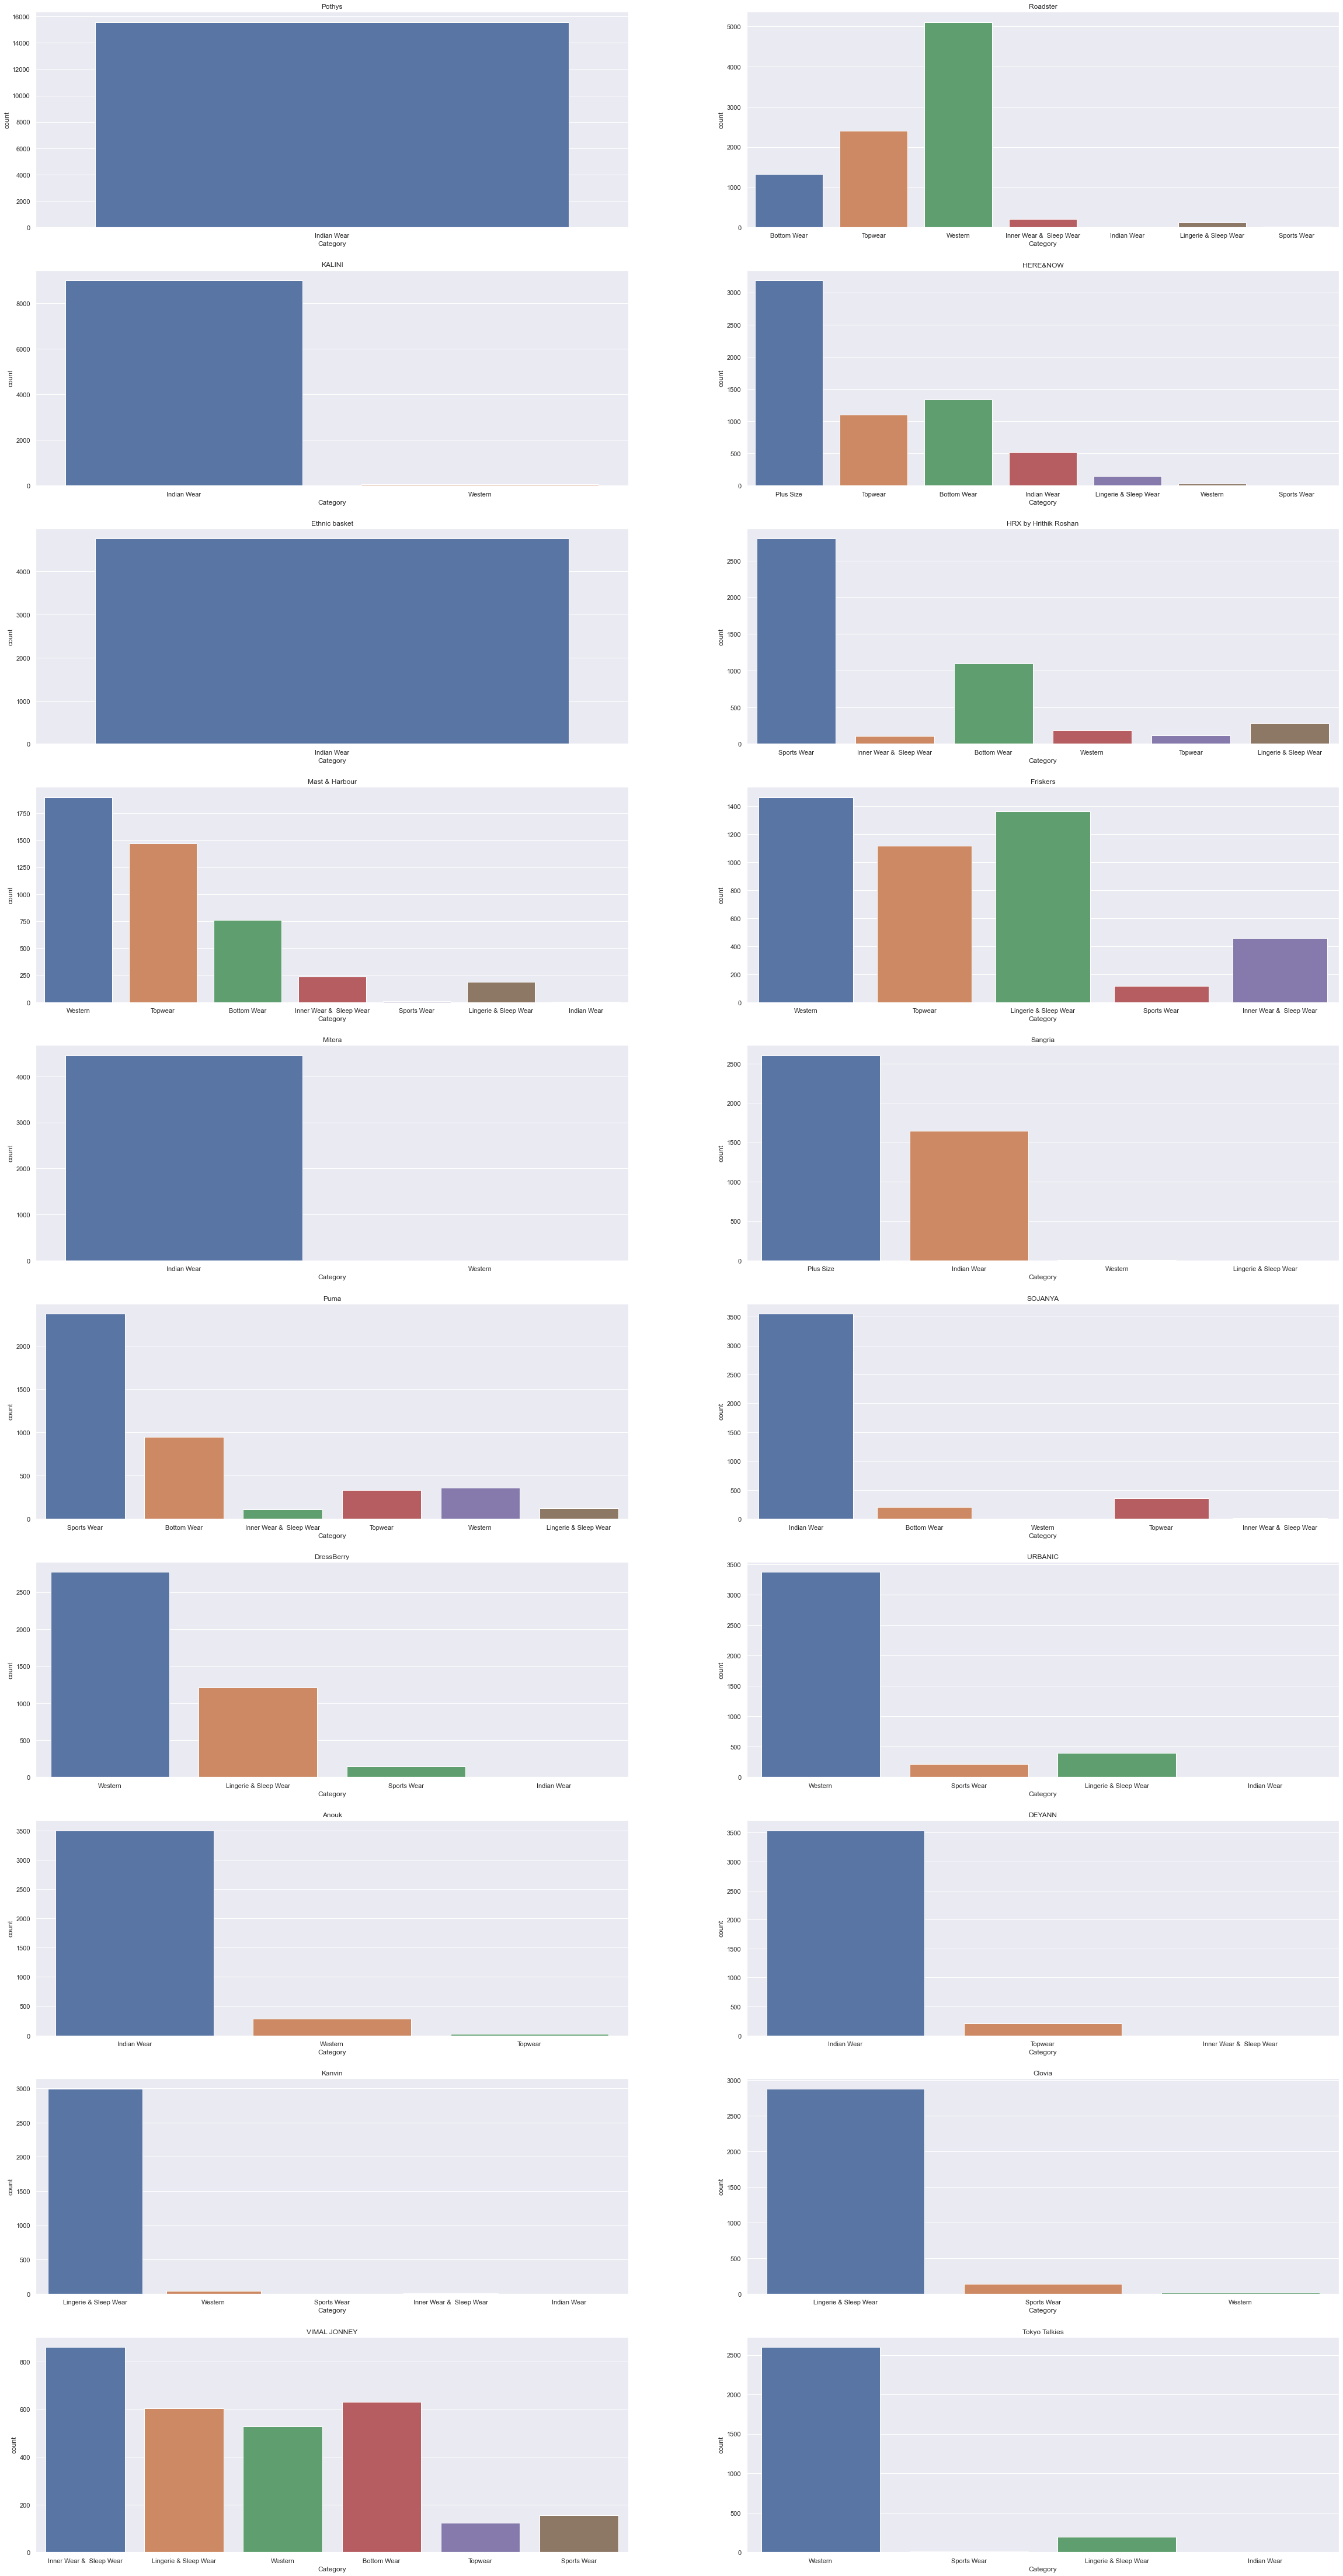

In [98]:
# Visulization of Category count for  Brands with most no of items-(Can get an idea of Each companies category of main focus)
z=1
plt.figure(figsize=(40,80))
for i in c.BrandName:
    x=data[data.BrandName==i]
    plt.subplot(10,2,z)
    sns.set(rc={'figure.figsize':(10,10)})
    plt.title(i)
    sns.countplot(data=x,x='Category')
    z+=1

#### Finding from Plots

1. Pothys,Kalini,Ethnic-basket,Mitera,Anouk,Deyann and Sojanya mainly focus on Indian wears
2. Roadster,Mast & harbour,Friskers,Dressberry,Tokyo and Talkies mainly focus on western wears
3. Puma and HRX mainly focus on sports wear

In [100]:
data.head()

BrandName               Category Individual_category    sex  \
0    Roadster            Bottom Wear               jeans    Men   
1  LOCOMOTIVE            Bottom Wear         track-pants    Men   
2    Roadster                Topwear              shirts    Men   
3      Zivame  Lingerie & Sleep Wear           shapewear  Women   
4    Roadster                Western             tshirts  Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  
0          675.0         1499.0      3.9    999.0      45.0  
1          632.0         1149.0      4.0    999.0      55.0  
2          769.0         1399.0      4.3    999.0      55.0  
3          401.0         1295.0      4.2    999.0      31.0  
4          210.0          599.0      4.2    999.0      35.0

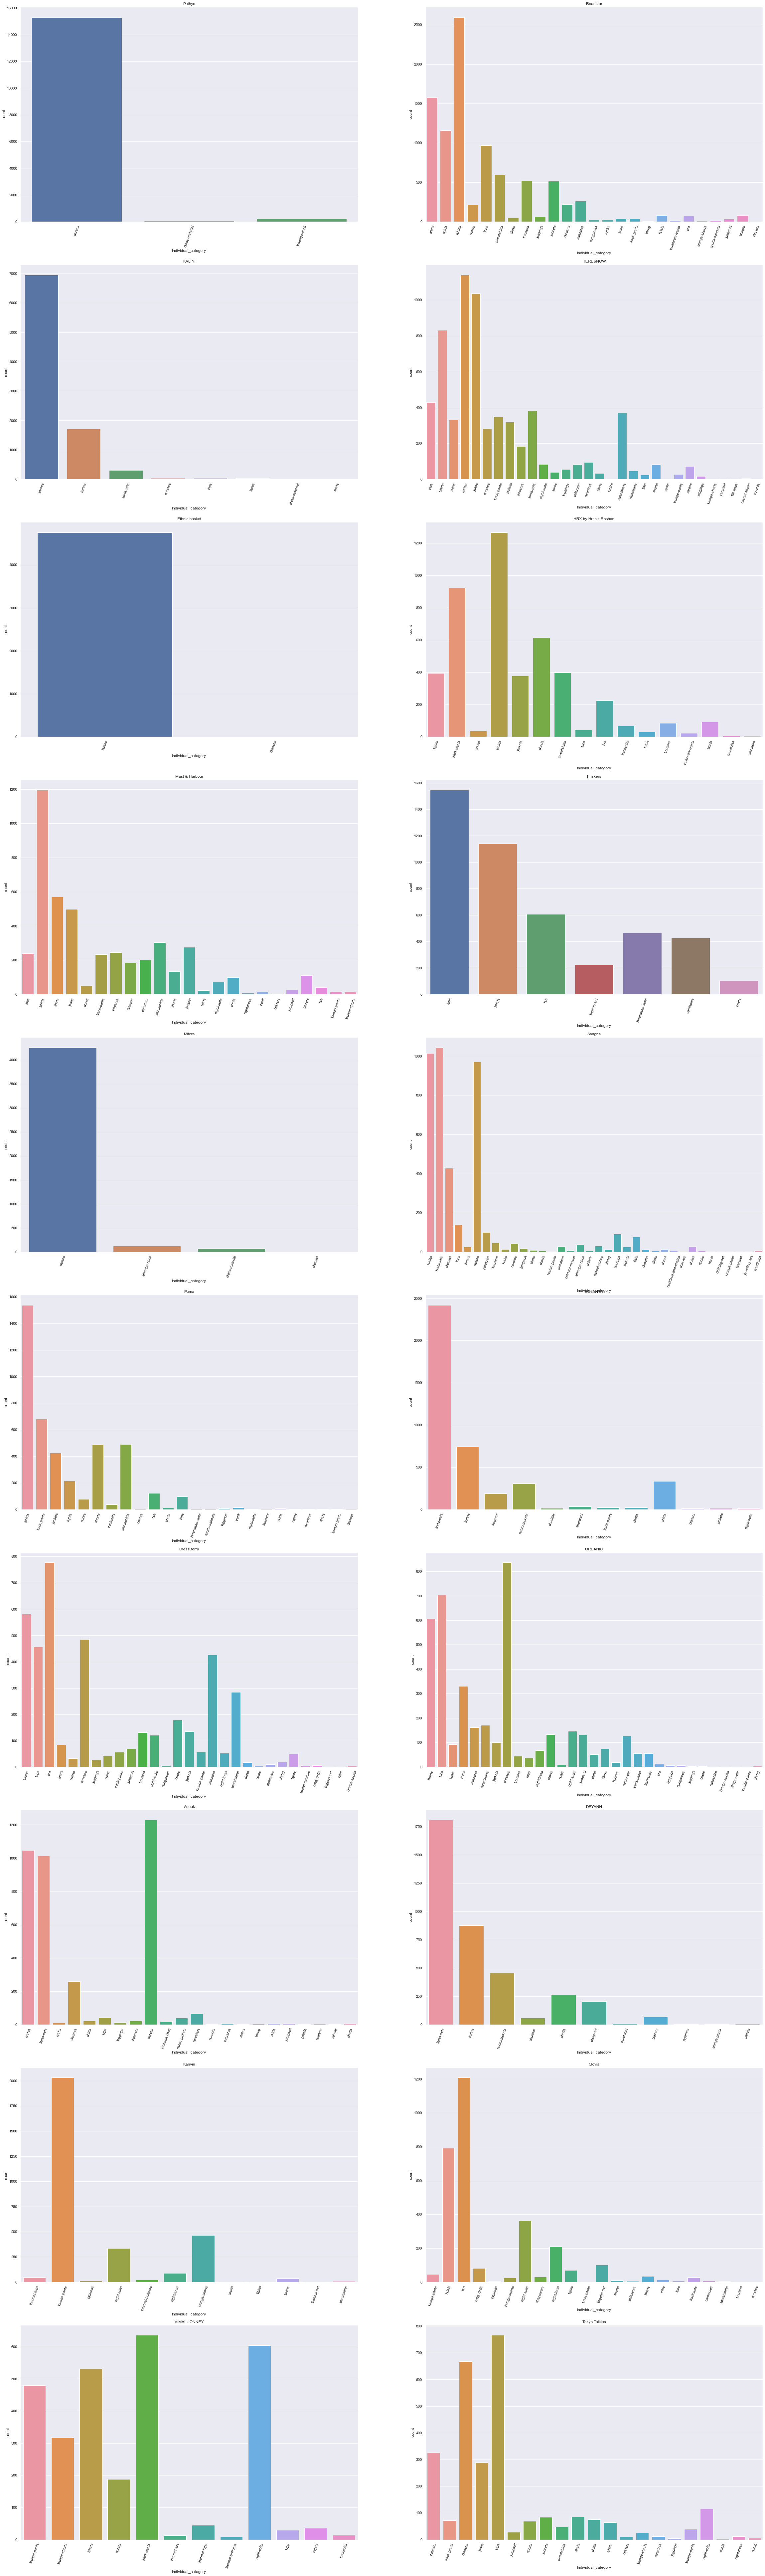

In [107]:
#Count of Individual_categories in each Brand
z=1
plt.figure(figsize=(40,140))
for i in c.BrandName:
    x=data[data.BrandName==i]
    plt.subplot(10,2,z)
    sns.set(rc={'figure.figsize':(10,40)})
    plt.title(i)
    sns.countplot(data=x,x='Individual_category')
    plt.xticks(rotation=70)
    z+=1

#### Findings from plots

1. Pothys,Kalini,Mitera,Anouk whose main category  is Indian wears and are mainly foucussed  on sarees

2. Roadster,Mast & harbour,Friskers,Dressberry,Tokyo and Talkies focussed on wide range of products

3. HRX and Puma focused on so many products, But their main focus is on Tshirts and track pants

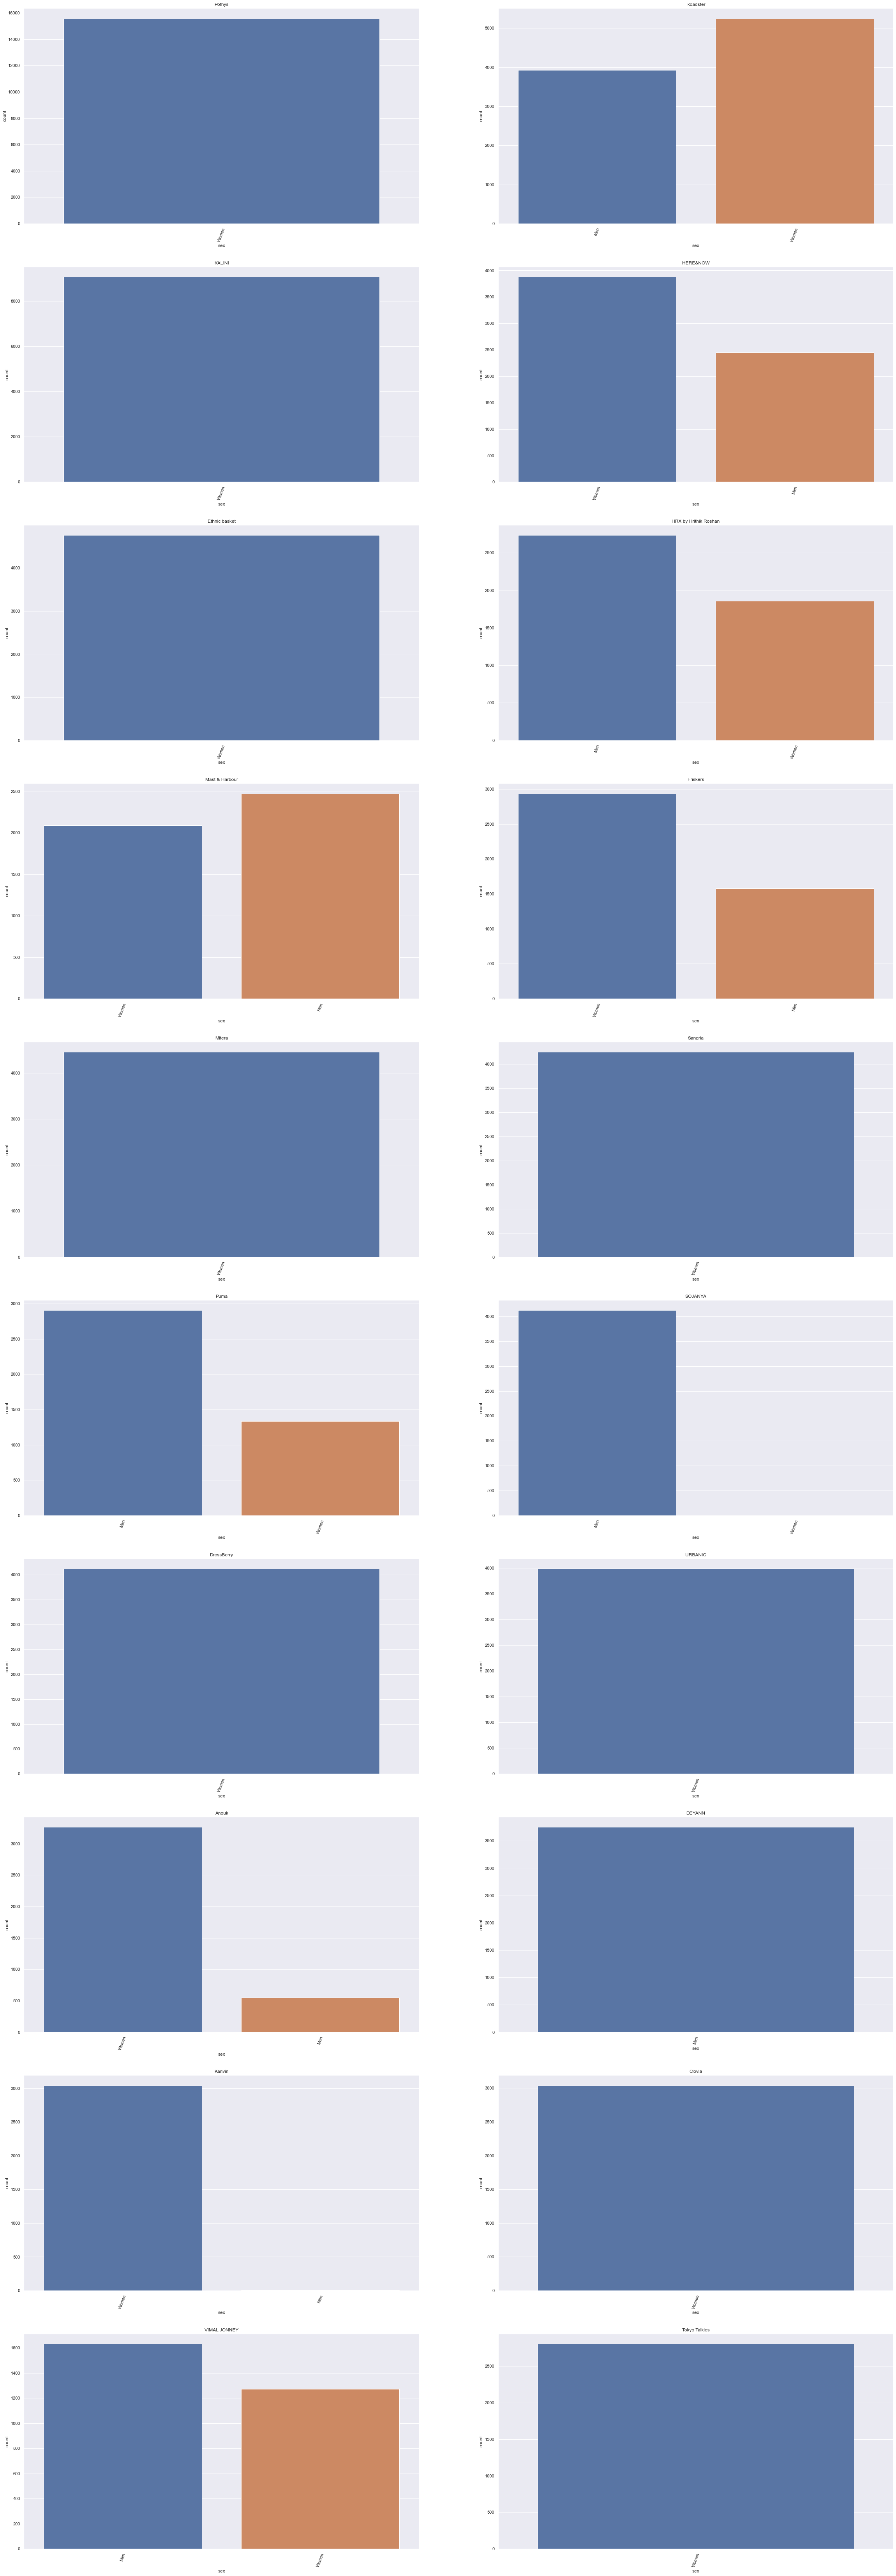

In [110]:
#Gender wise count for each brand
z=1
plt.figure(figsize=(40,120))
for i in c.BrandName:
    x=data[data.BrandName==i]
    plt.subplot(10,2,z)
    sns.set(rc={'figure.figsize':(10,40)})
    plt.title(i)
    sns.countplot(data=x,x='sex')
    plt.xticks(rotation=70)
    z+=1

#### Findings from the above plots

1. From the above plots based on gender, we can see that most of the companies focus on products related to women
2. Companies that manufactures sports wears focus mainly on men(Puma and HRX)(Not in  a general sense-only based on above data)

In [112]:
data.head()

BrandName               Category Individual_category    sex  \
0    Roadster            Bottom Wear               jeans    Men   
1  LOCOMOTIVE            Bottom Wear         track-pants    Men   
2    Roadster                Topwear              shirts    Men   
3      Zivame  Lingerie & Sleep Wear           shapewear  Women   
4    Roadster                Western             tshirts  Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  
0          675.0         1499.0      3.9    999.0      45.0  
1          632.0         1149.0      4.0    999.0      55.0  
2          769.0         1399.0      4.3    999.0      55.0  
3          401.0         1295.0      4.2    999.0      31.0  
4          210.0          599.0      4.2    999.0      35.0

In [49]:
num_fea=[i for i in data.columns if data[i].dtype !='O']
num_fea

['DiscountPrice', 'OriginalPrice', 'Ratings', 'Reviews', 'Discount']

#### Univariate Analysis of Numerical Features

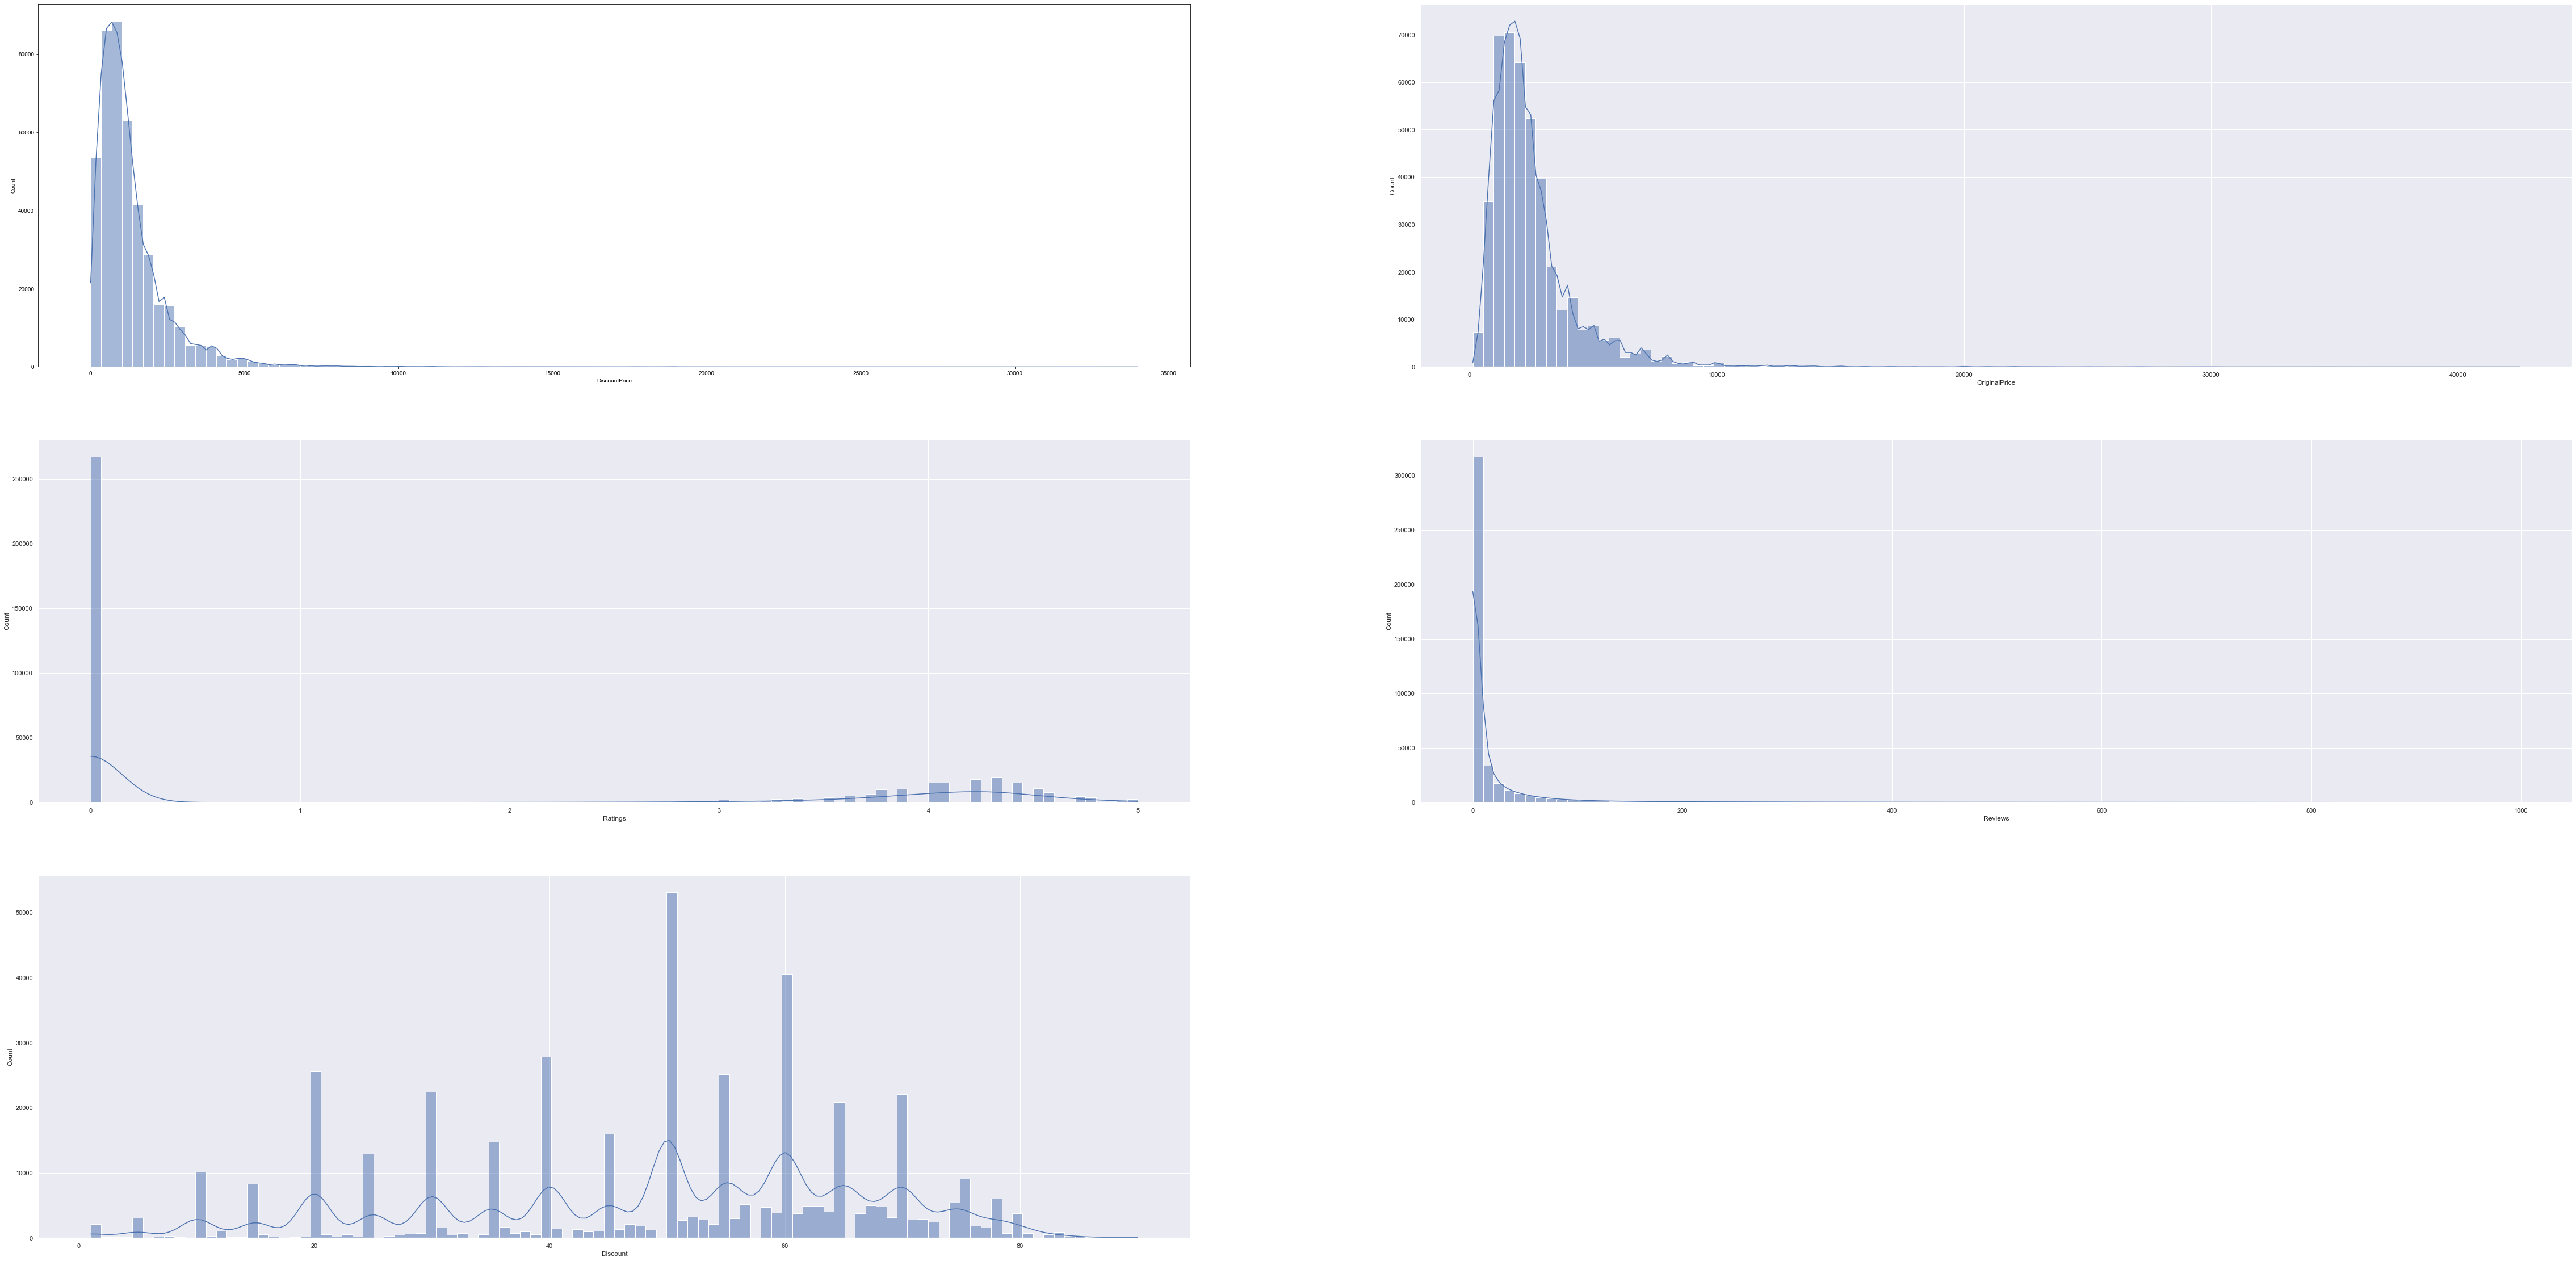

In [50]:
z=1
plt.figure(figsize=(80,40))
for i in num_fea:
    plt.subplot(3,2,z)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.histplot(data=data,x=i,kde=True,bins=100)
    z+=1
    
    

In [143]:
# data[data.Reviews==0].count()

In [144]:
# plt.figure(figsize=(10,5))
# sns.histplot(data=data,x='Reviews',kde=True,bins=50)

In [51]:
data.head()

BrandName               Category Individual_category    sex  \
0    Roadster            Bottom Wear               jeans    Men   
1  LOCOMOTIVE            Bottom Wear         track-pants    Men   
2    Roadster                Topwear              shirts    Men   
3      Zivame  Lingerie & Sleep Wear           shapewear  Women   
4    Roadster                Western             tshirts  Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  
0          675.0         1499.0      3.9    999.0      45.0  
1          632.0         1149.0      4.0    999.0      55.0  
2          769.0         1399.0      4.3    999.0      55.0  
3          401.0         1295.0      4.2    999.0      31.0  
4          210.0          599.0      4.2    999.0      35.0

In [50]:
num_fea

['DiscountPrice', 'OriginalPrice', 'Ratings', 'Reviews', 'Discount']

In [54]:
data.groupby(['BrandName','Individual_category'])['DiscountPrice'].mean()

BrandName       Individual_category
1 Stop Fashion  kurtas                 2259.884921
109F            dresses                1079.411765
                jackets                1000.000000
                jeans                  1184.750000
                kurtas                 1199.000000
                                          ...     
zebu            sweatshirts             869.000000
                tights                  824.000000
                tops                    479.800000
                track-pants             824.000000
                tshirts                 560.444444
Name: DiscountPrice, Length: 9511, dtype: float64

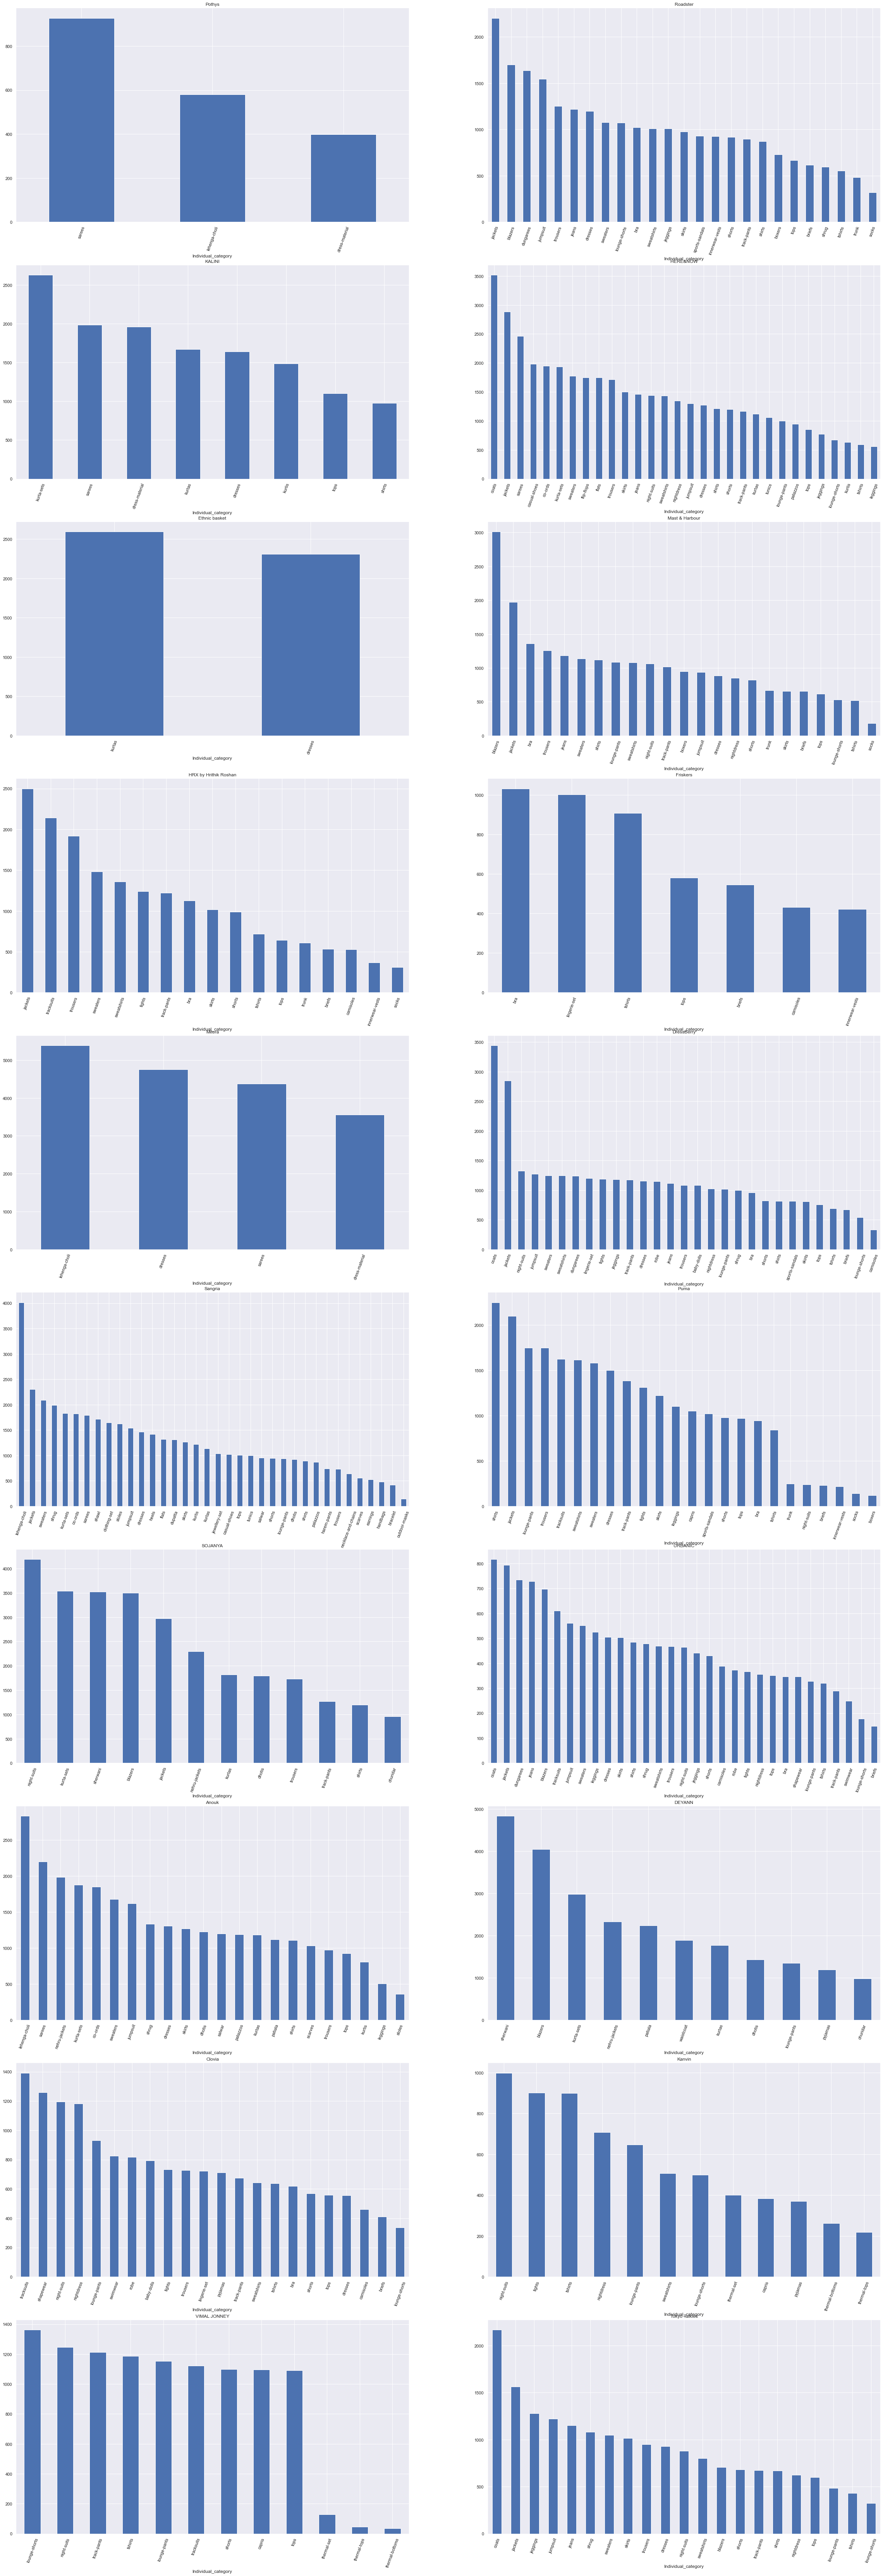

In [56]:
# Average discount price on each of the products in individual Category
z=1
plt.figure(figsize=(40,120))
for i in c.BrandName:
    x=data[data.BrandName==i]
    plt.subplot(10,2,z)
    sns.set(rc={'figure.figsize':(10,40)})
    plt.title(i)
    x.groupby(['Individual_category'])['DiscountPrice'].mean().sort_values(ascending=False).plot.bar()
    plt.xticks(rotation=70)
    z+=1

In [58]:
#New columns for Discount amount for each of the products
data['Discount_amount']=data['OriginalPrice']-data['DiscountPrice']
data.head()

BrandName               Category Individual_category    sex  \
0    Roadster            Bottom Wear               jeans    Men   
1  LOCOMOTIVE            Bottom Wear         track-pants    Men   
2    Roadster                Topwear              shirts    Men   
3      Zivame  Lingerie & Sleep Wear           shapewear  Women   
4    Roadster                Western             tshirts  Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  Discount_amount  
0          675.0         1499.0      3.9    999.0      45.0            824.0  
1          632.0         1149.0      4.0    999.0      55.0            517.0  
2          769.0         1399.0      4.3    999.0      55.0            630.0  
3          401.0         1295.0      4.2    999.0      31.0            894.0  
4          210.0          599.0      4.2    999.0      35.0            389.0

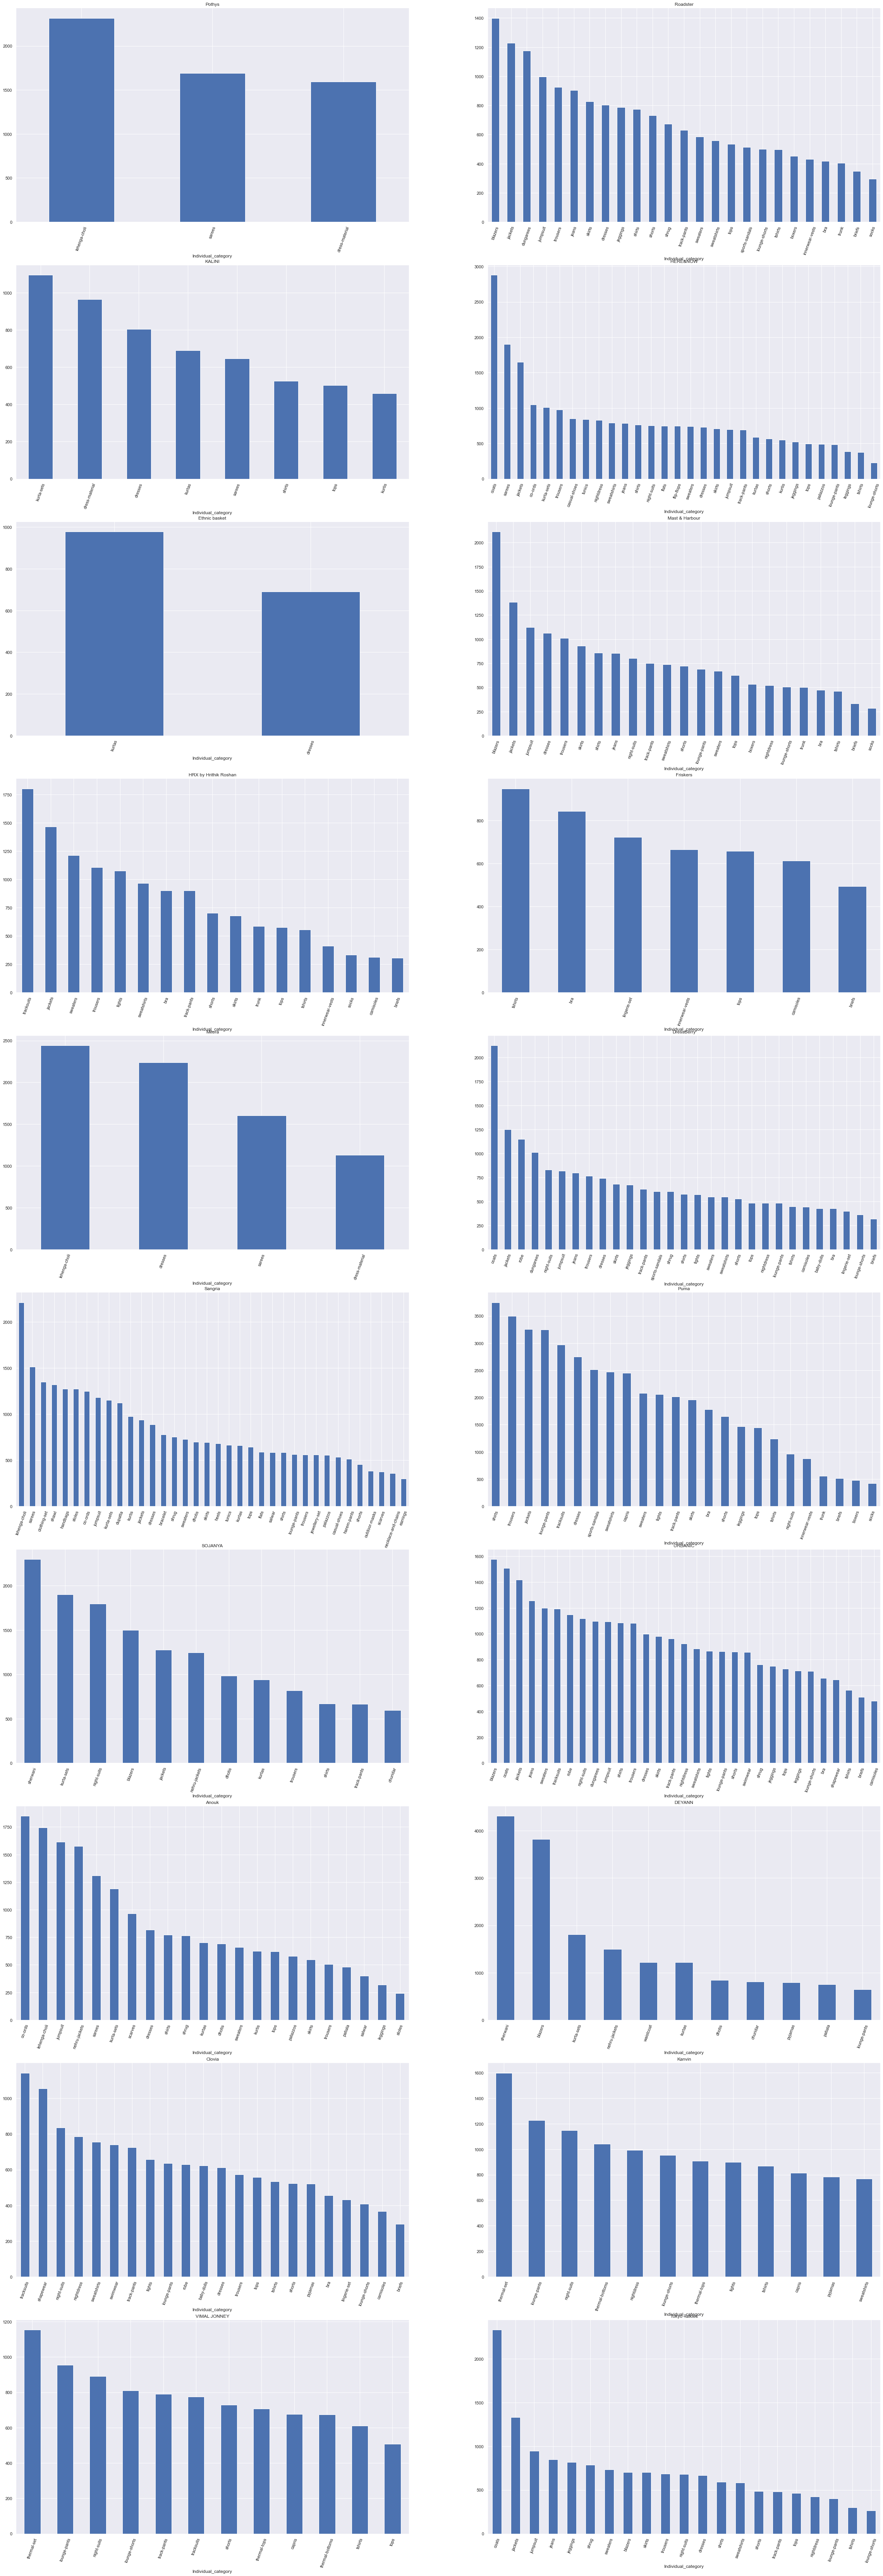

In [59]:
#Top(Count) 20 companies mean discount_amount on each products-
#From this plot we get an idea of discount amounts provided by each of the brands on their products.

plt.figure(figsize=(40,120))
for i in c.BrandName:
    x=data[data.BrandName==i]
    plt.subplot(10,2,z)
    sns.set(rc={'figure.figsize':(10,40)})
    plt.title(i)
    x.groupby(['Individual_category'])['Discount_amount'].mean().sort_values(ascending=False).plot.bar()
    plt.xticks(rotation=70)
    z+=1

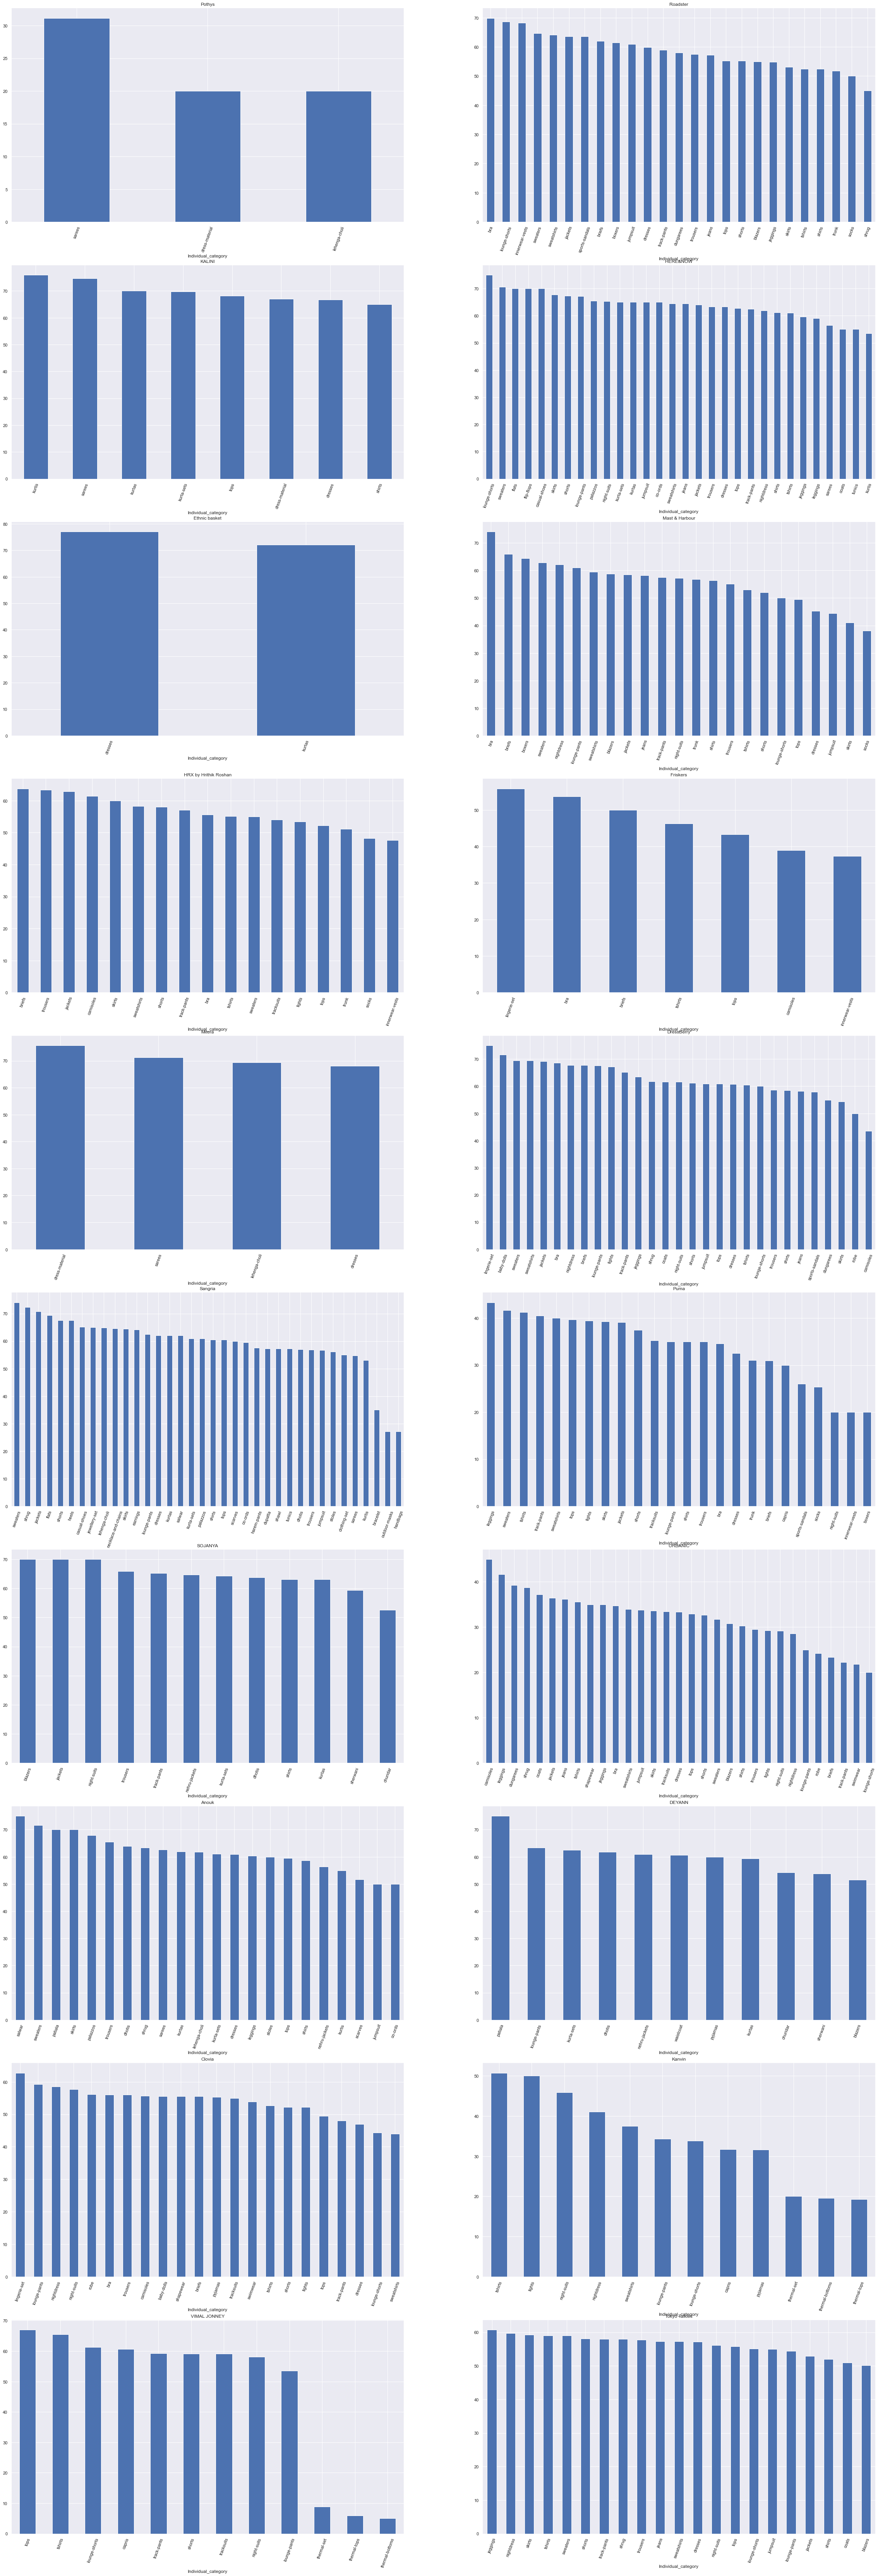

In [60]:
#Discounts provided by each of the company on their products--Almost all the companies provide upto 50% OFF on their products
z=1
plt.figure(figsize=(40,120))
for i in c.BrandName:
    x=data[data.BrandName==i]
    plt.subplot(10,2,z)
    sns.set(rc={'figure.figsize':(10,40)})
    plt.title(i)
    x.groupby(['Individual_category'])['Discount'].mean().sort_values(ascending=False).plot.bar()
    plt.xticks(rotation=70)
    z+=1

In [51]:
data.head()

BrandName               Category Individual_category    sex  \
0    Roadster            Bottom Wear               jeans    Men   
1  LOCOMOTIVE            Bottom Wear         track-pants    Men   
2    Roadster                Topwear              shirts    Men   
3      Zivame  Lingerie & Sleep Wear           shapewear  Women   
4    Roadster                Western             tshirts  Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  
0          675.0         1499.0      3.9    999.0      45.0  
1          632.0         1149.0      4.0    999.0      55.0  
2          769.0         1399.0      4.3    999.0      55.0  
3          401.0         1295.0      4.2    999.0      31.0  
4          210.0          599.0      4.2    999.0      35.0

In [83]:
#  This plot is a comparison of each of the brands discount price on each of the products in individual category 

z=1
plt.figure(figsize=(100,400))
for i in data.Individual_category.unique():
    x=data[data.Individual_category==i]
    plt.subplot(25,4,z)
    sns.set(rc={'figure.figsize':(10,30)})
    c=x.groupby(['BrandName'])['DiscountPrice'].mean().sort_values(ascending=False)[:20].reset_index()
    plt.title(i)
    sns.barplot(data=c,x='BrandName',y='DiscountPrice')
    plt.xticks(rotation=90);
    z+=1

In [75]:
# x=data[data.Individual_category=='jeans']

# x.head()


In [74]:
# c=x.groupby(['BrandName'])['DiscountPrice'].mean().sort_values(ascending=False)[:20].reset_index()
# sns.barplot(data=c,x='BrandName',y='DiscountPrice')
# plt.xticks(rotation=90);

In [84]:
data.head()

BrandName               Category Individual_category    sex  \
0    Roadster            Bottom Wear               jeans    Men   
1  LOCOMOTIVE            Bottom Wear         track-pants    Men   
2    Roadster                Topwear              shirts    Men   
3      Zivame  Lingerie & Sleep Wear           shapewear  Women   
4    Roadster                Western             tshirts  Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  
0          675.0         1499.0      3.9    999.0      45.0  
1          632.0         1149.0      4.0    999.0      55.0  
2          769.0         1399.0      4.3    999.0      55.0  
3          401.0         1295.0      4.2    999.0      31.0  
4          210.0          599.0      4.2    999.0      35.0

In [89]:
c.BrandName
   

0                    Pothys
1                  Roadster
2                    KALINI
3                  HERE&NOW
4             Ethnic basket
5            Mast & Harbour
6     HRX by Hrithik Roshan
7                  Friskers
8                    Mitera
9                DressBerry
10                  Sangria
11                     Puma
12                  SOJANYA
13                  URBANIC
14                    Anouk
15                   DEYANN
16                   Clovia
17                   Kanvin
18             VIMAL JONNEY
19            Tokyo Talkies
Name: BrandName, dtype: object

In [132]:
#data.groupby(['BrandName'])['Ratings'].mean().sort_values(ascending=False)

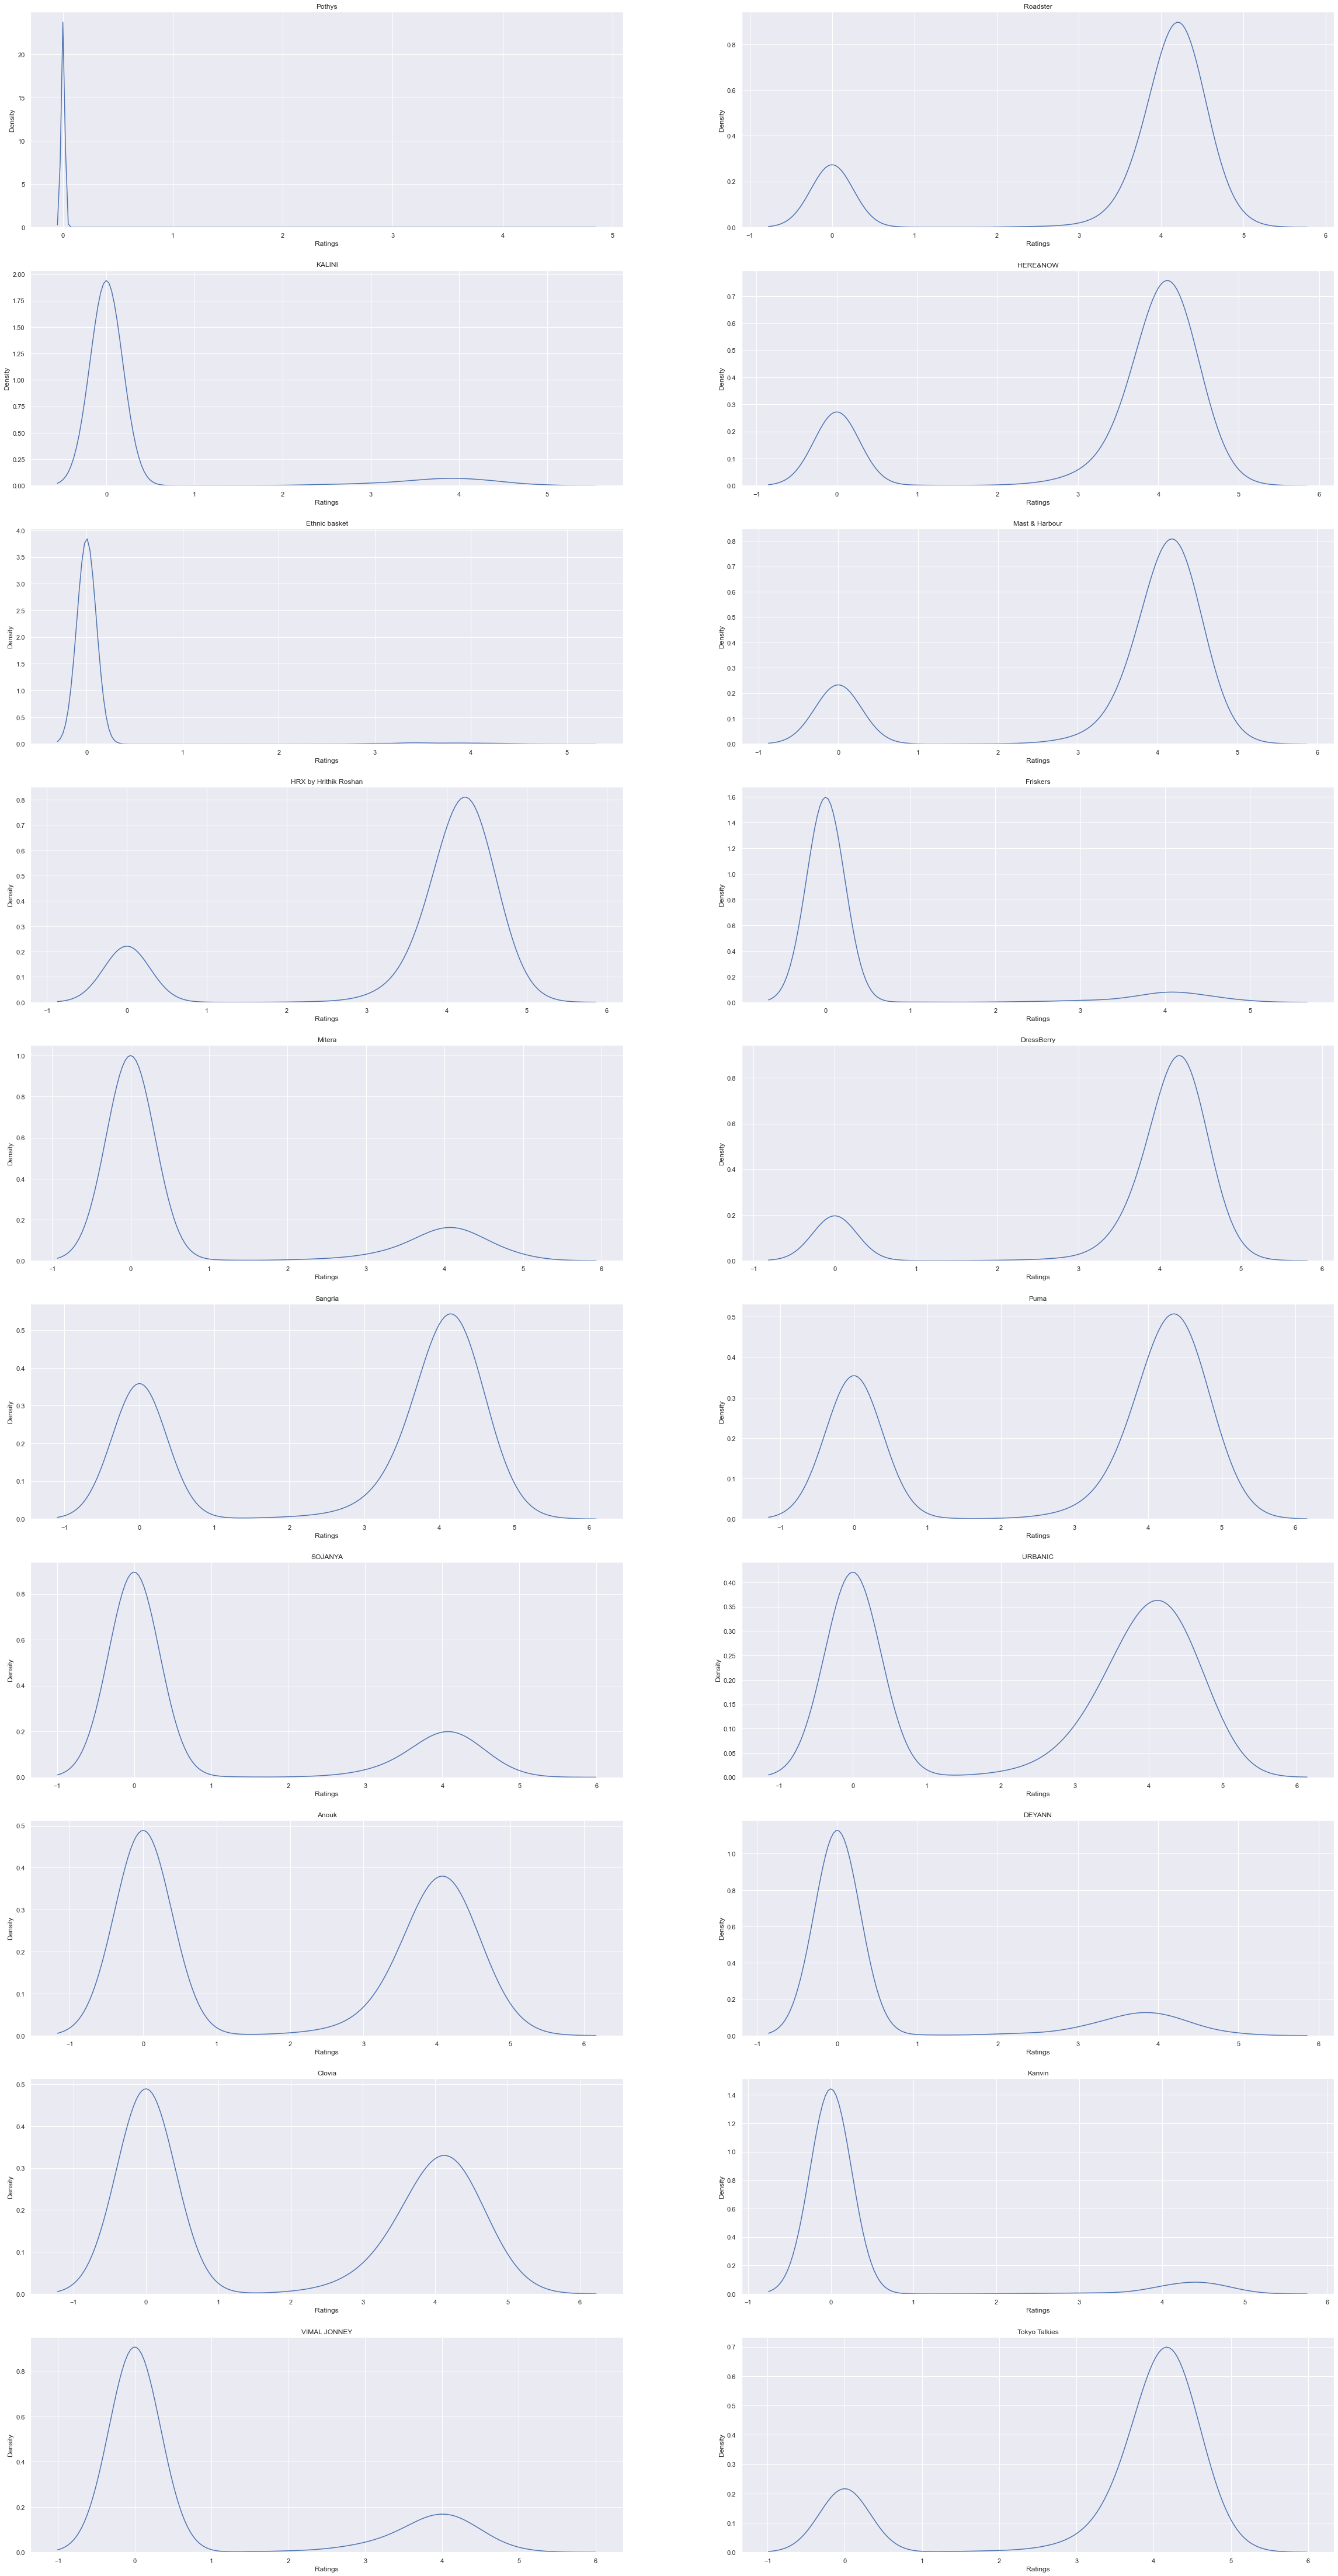

In [131]:
# Distribution of ratings  for first 20 companies having highest count
# Peak at zero  repesent NaN values--(Replaced Nan values with 0)
z=1
plt.figure(figsize=(40,80))
for i in c.BrandName:
    x=data[data.BrandName==i]
    plt.subplot(10,2,z)
    sns.set(rc={'figure.figsize':(10,30)})
    plt.title(i)
    sns.kdeplot(data=x,x='Ratings')
    z+=1

In [ ]:
# As we can see that ratings are mostly normaly distributed(Don't consider Zero(Nan) values)

In [135]:
data.head()

BrandName               Category Individual_category    sex  \
0    Roadster            Bottom Wear               jeans    Men   
1  LOCOMOTIVE            Bottom Wear         track-pants    Men   
2    Roadster                Topwear              shirts    Men   
3      Zivame  Lingerie & Sleep Wear           shapewear  Women   
4    Roadster                Western             tshirts  Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  Discount_amount  
0          675.0         1499.0      3.9    999.0      45.0            824.0  
1          632.0         1149.0      4.0    999.0      55.0            517.0  
2          769.0         1399.0      4.3    999.0      55.0            630.0  
3          401.0         1295.0      4.2    999.0      31.0            894.0  
4          210.0          599.0      4.2    999.0      35.0            389.0

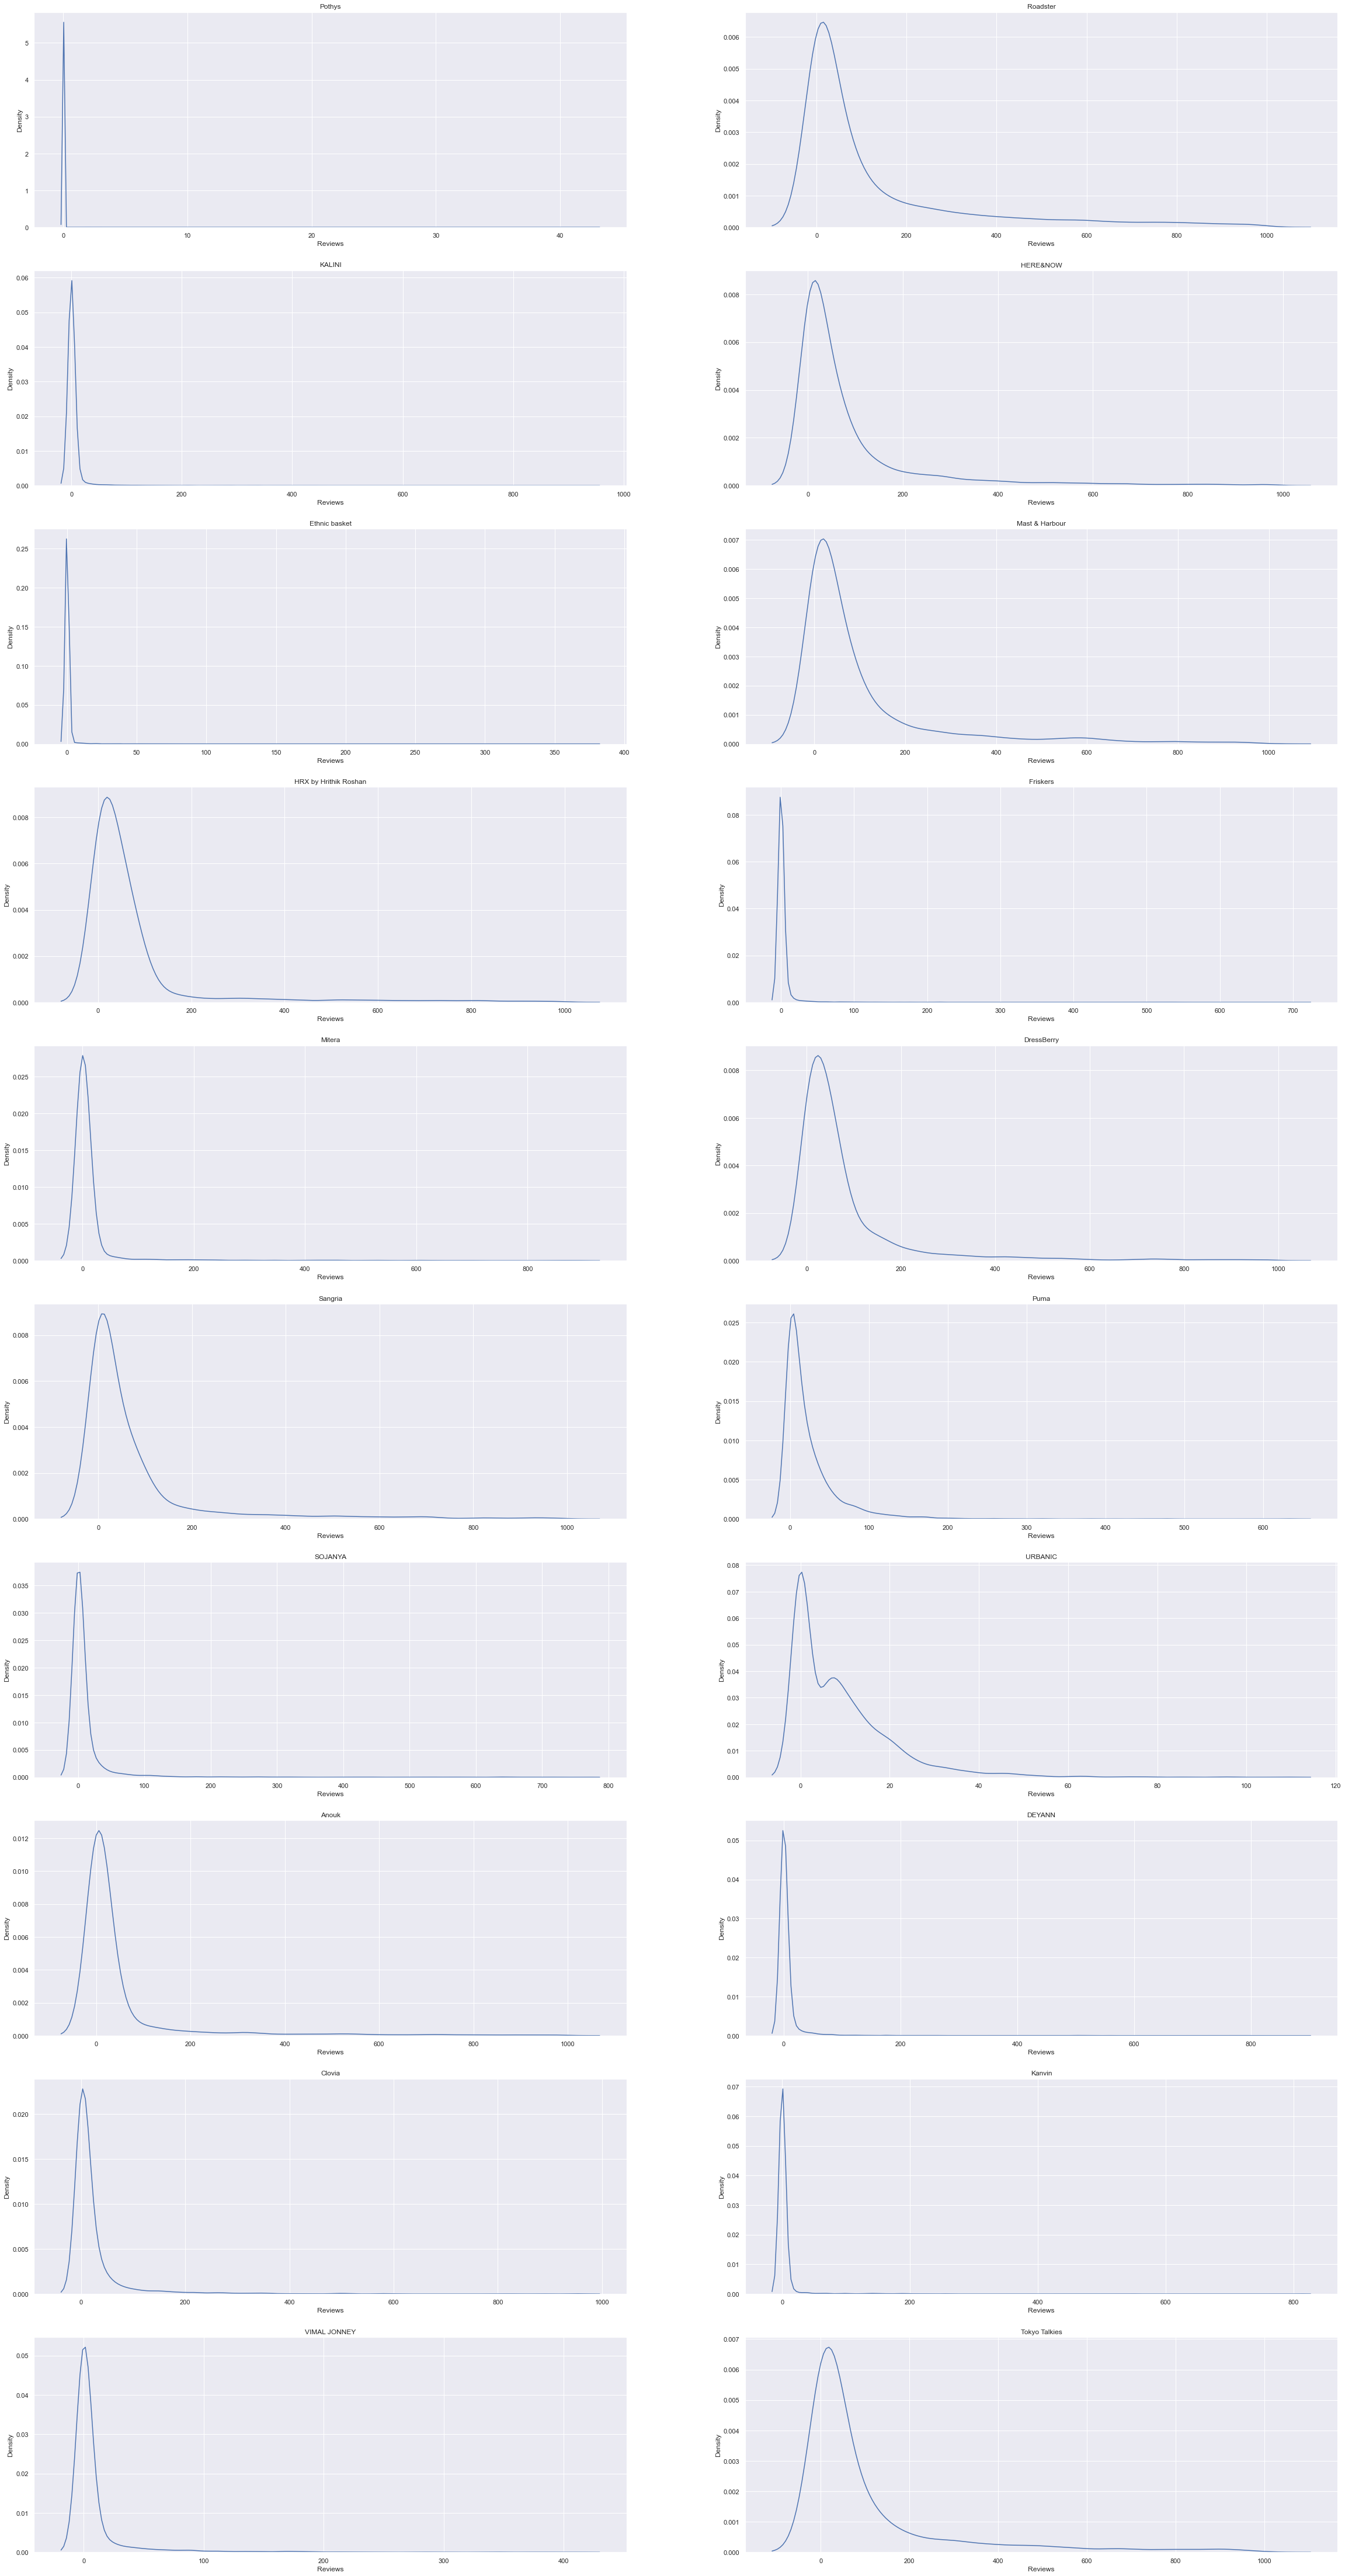

In [141]:
# Distribution of Reviews for first 20 companies having highest count
# Peak at zero  repesent NaN values--(Replaced Nan values with 0)
z=1
plt.figure(figsize=(40,80))
for i in c.BrandName:
    x=data[data.BrandName==i]
    plt.subplot(10,2,z)
    sns.set(rc={'figure.figsize':(10,30)})
    plt.title(i)
    sns.kdeplot(data=x,x='Reviews')
    z+=1

In [142]:
data.head()

BrandName               Category Individual_category    sex  \
0    Roadster            Bottom Wear               jeans    Men   
1  LOCOMOTIVE            Bottom Wear         track-pants    Men   
2    Roadster                Topwear              shirts    Men   
3      Zivame  Lingerie & Sleep Wear           shapewear  Women   
4    Roadster                Western             tshirts  Women   

   DiscountPrice  OriginalPrice  Ratings  Reviews  Discount  Discount_amount  
0          675.0         1499.0      3.9    999.0      45.0            824.0  
1          632.0         1149.0      4.0    999.0      55.0            517.0  
2          769.0         1399.0      4.3    999.0      55.0            630.0  
3          401.0         1295.0      4.2    999.0      31.0            894.0  
4          210.0          599.0      4.2    999.0      35.0            389.0

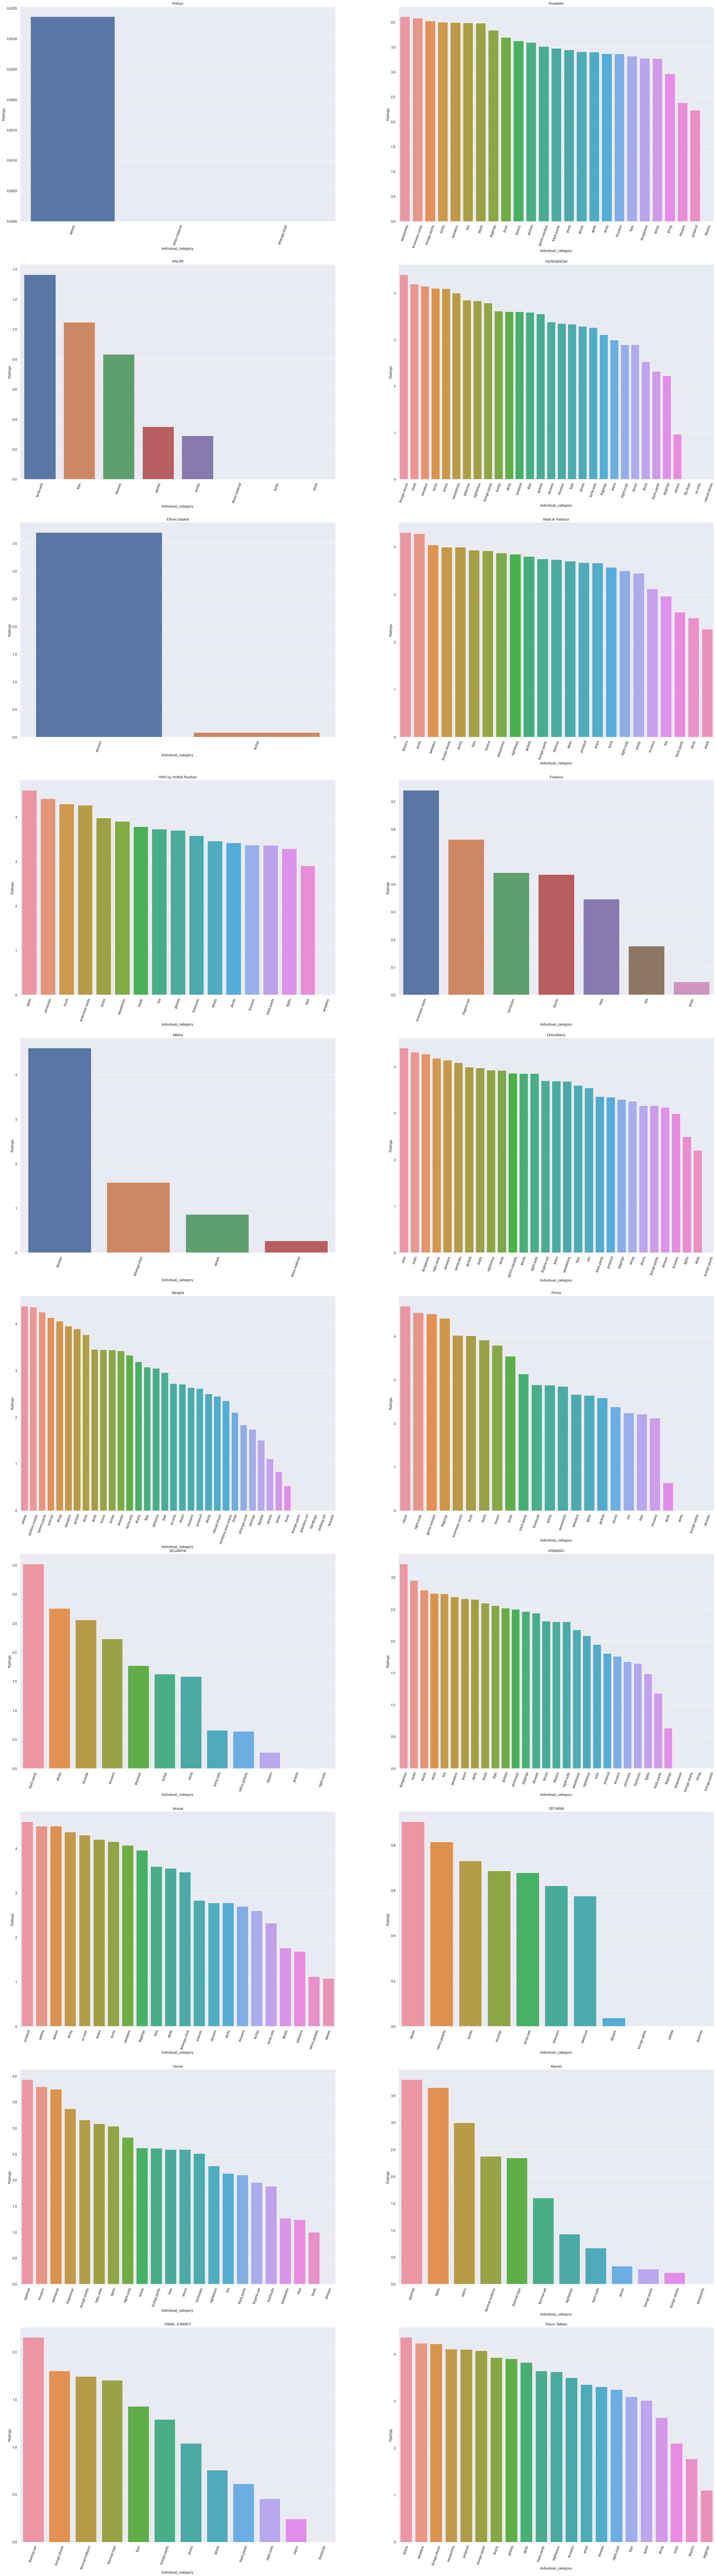

In [157]:
#Average ratings of each Individual categories for first 20 companies having highest count
z=1
plt.figure(figsize=(40,150))
for i in c.BrandName:
    x=data[data.BrandName==i]
    y=x.groupby(['Individual_category'])['Ratings'].mean().sort_values(ascending=False).reset_index()
    plt.subplot(10,2,z)
    sns.set(rc={'figure.figsize':(10,10)})
    plt.title(i)
    sns.barplot(data=y,x='Individual_category',y='Ratings');
    plt.xticks(rotation=70);
    z+=1

In [159]:
# x=data[data.BrandName=='Roadster']
# x.head()

In [158]:
# plt.figure(figsize=(10,5))
# c=x.groupby(['Individual_category'])['Ratings'].mean().sort_values(ascending=False).reset_index()
# sns.barplot(data=c,x='Individual_category',y='Ratings');
# plt.xticks(rotation=90);

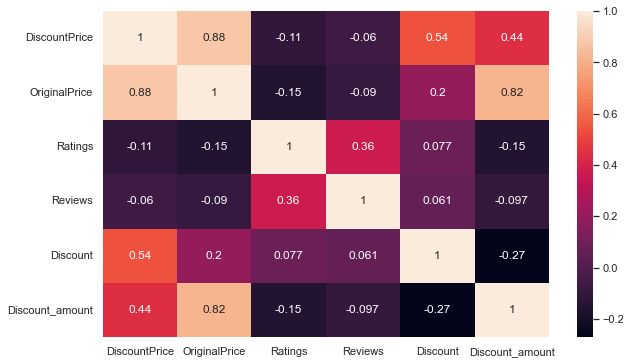

In [64]:
#To check for correlation
plt.figure(figsize=(10,6))
c=data.corr()
sns.heatmap(c,annot=True);

In [ ]:
# There is high corrlation between Original price and  discount price/Discount_amount as expected

In [68]:
# for i in num_fea:
#     plt.figure(figsize=(10,6))
#     sns.boxplot(data=data,x=i)
#     plt.show()